In [ ]:
!pip install pandas scikit-learn


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = '/content/pincodes_all.csv'
data = pd.read_csv(file_path)

# View the first few rows of the dataset to understand its structure
print(data.head())

# Step 1: Feature Engineering
# Select relevant features (region name, district) and the target variable (pincode)
features = ['Region Name', 'District']  # Assuming column names are as such, 'District' instead of 'District Name'
target = 'Pincode'  # Assuming 'Pincode' is the target column

# Handle missing data (if any)
data = data.dropna(subset=features + [target])

# Convert categorical data to numeric using Label Encoding
le_region = LabelEncoder()
le_district = LabelEncoder()

data['Region Name'] = le_region.fit_transform(data['Region Name'])
data['District'] = le_district.fit_transform(data['District']) # Use 'District'

# Features and target
X = data[features]
y = data[target]

# Step 2: Train-test split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: K-Fold Cross-validation and Random Forest model training
rf_model = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)

# K-Fold cross-validation
kf = KFold(n_splits=5)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='accuracy')

# Train the model
rf_model.fit(X_train, y_train)

# Step 4: Model evaluation
# Predict on the test set
y_pred = rf_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Step 5: Prediction Function
def predict_pincode(region_name, district_name):
    # Transform input data to encoded labels
    # Use try-except block to handle unseen labels
    try:
        region_encoded = le_region.transform([region_name])[0]
        district_encoded = le_district.transform([district_name])[0]
    except ValueError:
        # Return a message or handle the unseen label appropriately
        return "Unseen region or district. Please provide values from the training data."

    # Prepare the feature array for prediction
    input_data = [[region_encoded, district_encoded]]

    # Predict the pincode
    predicted_pincode = rf_model.predict(input_data)[0]

    return predicted_pincode

# Example usage for predicting the pincode
region_name_input = 'Kurnool Region'  # Replace with real input
district_name_input = 'ANANTHAPUR'  # Replace with real input

predicted_pincode = predict_pincode(region_name_input, district_name_input)
print(f"Predicted Pincode for {region_name_input}, {district_name_input}: {predicted_pincode}")


             Circle Name     Region Name       Division Name  \
0  Andhra Pradesh Circle  Kurnool Region  Anantapur Division   
1  Andhra Pradesh Circle  Kurnool Region  Anantapur Division   
2  Andhra Pradesh Circle  Kurnool Region  Anantapur Division   
3  Andhra Pradesh Circle  Kurnool Region  Anantapur Division   
4  Andhra Pradesh Circle  Kurnool Region  Anantapur Division   

           Office Name  Pincode OfficeType  Delivery    District  \
0  A Narayanapuram B.O   515004         BO  Delivery  ANANTHAPUR   
1          Akuledu B.O   515731         BO  Delivery  ANANTHAPUR   
2          Alamuru B.O   515002         BO  Delivery  ANANTHAPUR   
3        Allapuram B.O   515766         BO  Delivery  ANANTHAPUR   
4            Aluru B.O   515415         BO  Delivery  ANANTHAPUR   

        StateName  
0  Andhra Pradesh  
1  Andhra Pradesh  
2  Andhra Pradesh  
3  Andhra Pradesh  
4  Andhra Pradesh  
Test Accuracy: 7.04%
Predicted Pincode for Kurnool Region, ANANTHAPUR: 515761


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
tcimport pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
file_path = '/content/pincodes_all.csv'
data = pd.read_csv(file_path)

# Feature selection
features = ['Region Name', 'District', 'Office Name', 'Division Name', 'StateName']  # More relevant features
target = 'Pincode'  # Target column

# Handle missing data by forward filling (or choose imputation if needed)
data = data.ffill()

# Convert categorical data to numeric using One-Hot Encoding for better differentiation of categories
categorical_features = ['Region Name', 'District', 'Office Name', 'Division Name', 'StateName']
onehot_encoder = OneHotEncoder()

# Step 1: Create a pipeline for preprocessing and model
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', onehot_encoder, categorical_features)])

# Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf_model)])

# Step 2: Split the data
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Hyperparameter tuning using GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [15, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Step 4: Evaluate the best model
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best model test accuracy: {accuracy * 100:.2f}%")

# Step 5: Update prediction function
def predict_pincode(region_name, district_name, office_name, division_name, state_name):
    # Input preprocessing using OneHotEncoder
    input_data = [[region_name, district_name, office_name, division_name, state_name]]
    predicted_pincode = best_model.predict(input_data)[0]
    return predicted_pincode

# Example prediction
region_name_input = 'Kurnool Region'
district_name_input = 'ANANTHAPUR'
office_name_input = 'A Narayanapuram B.O'
division_name_input = 'Anantapur Division'
state_name_input = 'Andhra Pradesh'

predicted_pincode = predict_pincode(region_name_input, district_name_input, office_name_input, division_name_input, state_name_input)
print(f"Predicted Pincode: {predicted_pincode}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGKILL(-9)}

Index(['Circle Name', 'Region Name', 'Division Name', 'Office Name', 'Pincode',
       'OfficeType', 'Delivery', 'District', 'StateName'],
      dtype='object')
Cross-validated accuracy scores: [0.96047251 0.96289565 0.96244131 0.96016962 0.96244131]
Mean cross-validation accuracy: 0.9616840829925792
Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation accuracy: 0.9630168105406632
Test Accuracy: 0.9622001453840562
Classification Report:
              precision    recall  f1-score   support

    Delivery       0.97      1.00      0.98      7872
Non Delivery       0.74      0.28      0.41       382

    accuracy                           0.96      8254
   macro avg       0.85      0.64      0.69      8254
weighted avg       0.96      0.96      0.95      8254

Confusion Matrix:
[[7834   38]
 [ 274  108]]
Feature ranking:
1. Feature Pincode (0.6345832154727228)
2. Feature Office Name (0.2449710586500773)
3. Featu

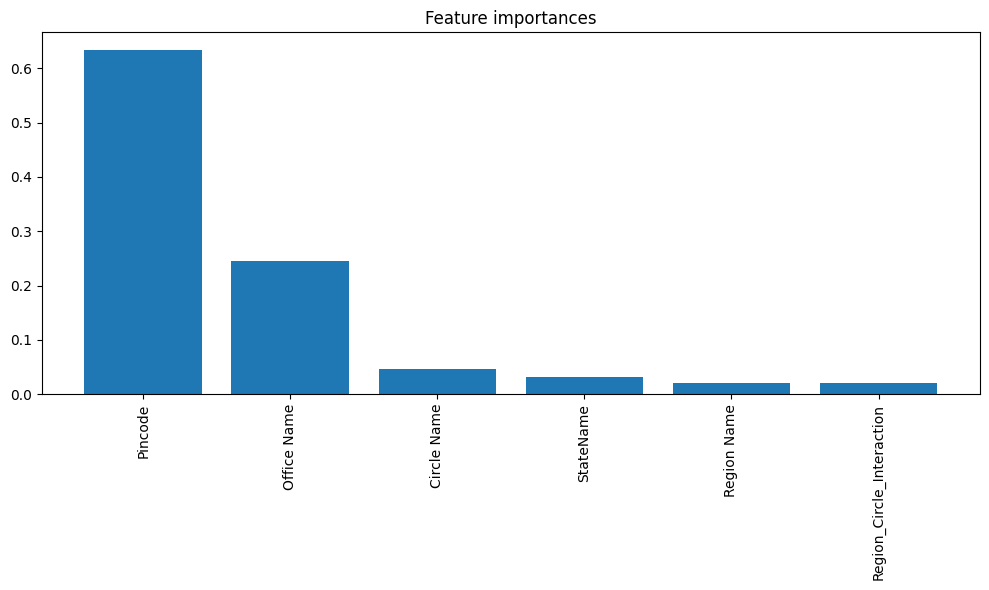

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the CSV data
file_path = '/content/pincodes_all.csv'  # Update this to the correct file path if needed
data = pd.read_csv(file_path)

# Check column names
print(data.columns)  # Add this line to inspect the exact column names

# Step 2: Data Preprocessing
# Handling missing values (fill with forward fill for simplicity)
data.ffill(inplace=True)  # Updated to use ffill() instead of fillna(method='ffill')

# Encoding categorical variables
label_encoders = {}
# Replace the column names as needed based on the print statement from above
for column in ['Office Name', 'Region Name', 'Circle Name', 'StateName']:  # Adjust these column names if necessary
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define features (X) and target (y) - Using 'Delivery' as the target based on the available columns
X = data[['Pincode', 'Office Name', 'Region Name', 'Circle Name', 'StateName']]  # Verify and adjust column names
y = data['Delivery']  # Replace 'Delivery Status' with 'Delivery'

# Step 3: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Feature Engineering (optional, creating interaction terms as an example)
X_train['Region_Circle_Interaction'] = X_train['Region Name'] * X_train['Circle Name']
X_test['Region_Circle_Interaction'] = X_test['Region Name'] * X_test['Circle Name']

# Step 5: Define and train the Random Forest model with K-Fold Cross-Validation
rf_model = RandomForestClassifier(
    n_estimators=100,     # Number of trees
    max_depth=10,         # Maximum depth of each tree
    min_samples_split=10, # Minimum number of samples to split a node
    min_samples_leaf=4,   # Minimum number of samples in a leaf node
    random_state=42
)

# Step 6: Perform K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='accuracy')
print(f"Cross-validated accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean()}")

# Step 7: Hyperparameter Tuning Using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=kf, n_jobs=-1, scoring='accuracy')

grid_search.fit(X_train, y_train)

# Best hyperparameters and best score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

# Step 8: Train the model with the best parameters on the full training set
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Step 9: Evaluate the model on the test set
y_pred = best_rf_model.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 10: Feature Importance Analysis
# Plotting feature importances
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order

# Print the feature ranking
print("Feature ranking:")

for i in range(X_train.shape[1]):
    print(f"{i+1}. Feature {X_train.columns[indices[i]]} ({importances[indices[i]]})")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import requests
import time

# Load the dataset
file_path = '/content/Kurnool_Region_BO_offices.csv'  # Adjust to the actual file path
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Function to get latitude and longitude from the pincode using OSM Nominatim API
def get_lat_long_osm(pincode):
    base_url = "https://nominatim.openstreetmap.org/search"
    params = {
        "postalcode": pincode,
        "countrycodes": "IN",  # Set to India, change it as needed
        "format": "json"
    }
    response = requests.get(base_url, params=params, headers={'User-Agent': 'Mozilla/5.0'})
    if response.status_code == 200 and len(response.json()) > 0:
        result = response.json()[0]
        return result['lat'], result['lon']
    return None, None

# Add Latitude and Longitude columns
df['Latitude'] = None
df['Longitude'] = None

# Iterate through unique pin codes to avoid repeated API calls
unique_pincodes = df['Pincode'].unique()

for pincode in unique_pincodes:
    lat, lng = get_lat_long_osm(pincode)

    # Update the corresponding rows with the latitude and longitude
    df.loc[df['Pincode'] == pincode, 'Latitude'] = lat
    df.loc[df['Pincode'] == pincode, 'Longitude'] = lng

    print(f"Processed Pincode: {pincode} | Latitude: {lat}, Longitude: {lng}")

    # Delay to respect API rate limits
    time.sleep(1)  # Add delay to avoid hitting the request limit

# Save the updated dataset with latitudes and longitudes
output_file = 'Pincode_30052019_with_lat_long_osm.csv'
df.to_csv(output_file, index=False)

print(f"Updated dataset saved to {output_file}")

Processed Pincode: 515004 | Latitude: 14.743604210344827, Longitude: 77.6916881275862
Processed Pincode: 515731 | Latitude: 14.8181186, Longitude: 77.59799345
Processed Pincode: 515002 | Latitude: 14.681397621052632, Longitude: 77.61501318421053
Processed Pincode: 515766 | Latitude: 14.2914167, Longitude: 77.0348529
Processed Pincode: 515415 | Latitude: 14.9489458, Longitude: 78.0290549
Processed Pincode: 515741 | Latitude: 14.71633745, Longitude: 77.1308029
Processed Pincode: 515775 | Latitude: 14.946338566666666, Longitude: 77.59040526666666
Processed Pincode: 515455 | Latitude: 15.0627154, Longitude: 77.7825672
Processed Pincode: 515445 | Latitude: 14.9296529, Longitude: 77.8611195
Processed Pincode: 515465 | Latitude: 14.661599, Longitude: 78.03633915
Processed Pincode: 515867 | Latitude: 14.691094, Longitude: 76.972639
Processed Pincode: 515763 | Latitude: None, Longitude: None
Processed Pincode: 515767 | Latitude: 14.44578725, Longitude: 76.9789915
Processed Pincode: 515722 | Lat

In [ ]:
import pandas as pd
import requests
import time

# Load the dataset
file_path = '/content/Kurnool_Region_HO_offices.csv'  # Adjust to the actual file path
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Function to get latitude and longitude from the pincode using OSM Nominatim API
def get_lat_long_osm(pincode):
    base_url = "https://nominatim.openstreetmap.org/search"
    params = {
        "postalcode": pincode,
        "countrycodes": "IN",  # Set to India, change it as needed
        "format": "json"
    }
    response = requests.get(base_url, params=params, headers={'User-Agent': 'Mozilla/5.0'})
    if response.status_code == 200 and len(response.json()) > 0:
        result = response.json()[0]
        return result['lat'], result['lon']
    return None, None

# Add Latitude and Longitude columns
df['Latitude'] = None
df['Longitude'] = None

# Iterate through unique pin codes to avoid repeated API calls
unique_pincodes = df['Pincode'].unique()

for pincode in unique_pincodes:
    lat, lng = get_lat_long_osm(pincode)

    # Update the corresponding rows with the latitude and longitude
    df.loc[df['Pincode'] == pincode, 'Latitude'] = lat
    df.loc[df['Pincode'] == pincode, 'Longitude'] = lng

    print(f"Processed Pincode: {pincode} | Latitude: {lat}, Longitude: {lng}")

    # Delay to respect API rate limits
    time.sleep(1)  # Add delay to avoid hitting the request limit

# Save the updated dataset with latitudes and longitudes
output_file = 'Pincode_30052019_with_lat_long_osm.csv'
df.to_csv(output_file, index=False)

print(f"Updated dataset saved to {output_file}")

Processed Pincode: 515001 | Latitude: 14.673444204615384, Longitude: 77.60027021076924
Processed Pincode: 515801 | Latitude: 15.16406944, Longitude: 77.378423872
Processed Pincode: 517001 | Latitude: 13.22445589117647, Longitude: 79.08843681911765
Processed Pincode: 517325 | Latitude: 13.5542343, Longitude: 78.50535363064516
Processed Pincode: 516001 | Latitude: 14.476169165137616, Longitude: 78.82285875963302
Processed Pincode: 516115 | Latitude: 14.195395267857144, Longitude: 79.15994681785715
Processed Pincode: 515671 | Latitude: 14.40968261724138, Longitude: 77.71823494482759
Processed Pincode: 515201 | Latitude: 13.830675426190478, Longitude: 77.49455066904761
Processed Pincode: 518301 | Latitude: 15.623650621276596, Longitude: 77.27409315531915
Processed Pincode: 518001 | Latitude: 15.816148689285713, Longitude: 78.05866339285714
Processed Pincode: 523316 | Latitude: 15.738637661290324, Longitude: 79.26838322903225
Processed Pincode: 518501 | Latitude: 15.485163155102041, Longitu

In [ ]:
import pandas as pd
import requests
import time

# Load the dataset
file_path = '/content/Kurnool_Region_SO_offices.csv'  # Adjust to the actual file path
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Function to get latitude and longitude from the pincode using OSM Nominatim API
def get_lat_long_osm(pincode):
    base_url = "https://nominatim.openstreetmap.org/search"
    params = {
        "postalcode": pincode,
        "countrycodes": "IN",  # Set to India, change it as needed
        "format": "json"
    }
    response = requests.get(base_url, params=params, headers={'User-Agent': 'Mozilla/5.0'})
    if response.status_code == 200 and len(response.json()) > 0:
        result = response.json()[0]
        return result['lat'], result['lon']
    return None, None

# Add Latitude and Longitude columns
df['Latitude'] = None
df['Longitude'] = None

# Iterate through unique pin codes to avoid repeated API calls
unique_pincodes = df['Pincode'].unique()

for pincode in unique_pincodes:
    lat, lng = get_lat_long_osm(pincode)

    # Update the corresponding rows with the latitude and longitude
    df.loc[df['Pincode'] == pincode, 'Latitude'] = lat
    df.loc[df['Pincode'] == pincode, 'Longitude'] = lng

    print(f"Processed Pincode: {pincode} | Latitude: {lat}, Longitude: {lng}")

    # Delay to respect API rate limits
    time.sleep(1)  # Add delay to avoid hitting the request limit

# Save the updated dataset with latitudes and longitudes
output_file = 'Pincode_30052019_with_lat_long_osm.csv'
df.to_csv(output_file, index=False)

print(f"Updated dataset saved to {output_file}")

Processed Pincode: 515822 | Latitude: 14.8289023, Longitude: 77.2527061
Processed Pincode: 515445 | Latitude: 14.9296529, Longitude: 77.8611195
Processed Pincode: 515001 | Latitude: 14.673444204615384, Longitude: 77.60027021076924
Processed Pincode: 515002 | Latitude: 14.681397621052632, Longitude: 77.61501318421053
Processed Pincode: 515751 | Latitude: 14.655567033333334, Longitude: 77.41259216666666
Processed Pincode: 515741 | Latitude: 14.71633745, Longitude: 77.1308029
Processed Pincode: 515413 | Latitude: None, Longitude: None
Processed Pincode: 515763 | Latitude: None, Longitude: None
Processed Pincode: 515701 | Latitude: 14.704657780000002, Longitude: 77.6492323
Processed Pincode: 515415 | Latitude: 14.9489458, Longitude: 78.0290549
Processed Pincode: 515005 | Latitude: 14.679587682352942, Longitude: 77.60711306470589
Processed Pincode: 515731 | Latitude: 14.8181186, Longitude: 77.59799345
Processed Pincode: 515004 | Latitude: 14.743604210344827, Longitude: 77.6916881275862
Proc

In [ ]:
import pandas as pd
import requests
import time

# Load the dataset
file_path = '/content/South_Bengal_Region_HO_offices.csv'  # Adjust to the actual file path
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Function to get latitude and longitude from the pincode using OSM Nominatim API
def get_lat_long_osm(pincode):
    base_url = "https://nominatim.openstreetmap.org/search"
    params = {
        "postalcode": pincode,
        "countrycodes": "IN",  # Set to India, change it as needed
        "format": "json"
    }
    response = requests.get(base_url, params=params, headers={'User-Agent': 'Mozilla/5.0'})
    if response.status_code == 200 and len(response.json()) > 0:
        result = response.json()[0]
        return result['lat'], result['lon']
    return None, None

# Add Latitude and Longitude columns
df['Latitude'] = None
df['Longitude'] = None

# Iterate through unique pin codes to avoid repeated API calls
unique_pincodes = df['Pincode'].unique()

for pincode in unique_pincodes:
    lat, lng = get_lat_long_osm(pincode)

    # Update the corresponding rows with the latitude and longitude
    df.loc[df['Pincode'] == pincode, 'Latitude'] = lat
    df.loc[df['Pincode'] == pincode, 'Longitude'] = lng

    print(f"Processed Pincode: {pincode} | Latitude: {lat}, Longitude: {lng}")

    # Delay to respect API rate limits
    time.sleep(1)  # Add delay to avoid hitting the request limit

# Save the updated dataset with latitudes and longitudes
output_file = 'Pincode_30052019_with_lat_long_osm.csv'
df.to_csv(output_file, index=False)

print(f"Updated dataset saved to {output_file}")

Processed Pincode: 713301 | Latitude: 23.68356155238095, Longitude: 86.97316467619048
Processed Pincode: 713201 | Latitude: 23.49477545, Longitude: 87.3211981
Processed Pincode: 713347 | Latitude: 23.61696472857143, Longitude: 87.11913284285714
Processed Pincode: 722101 | Latitude: 23.231731414285715, Longitude: 87.05851933571428
Processed Pincode: 713101 | Latitude: 23.26481015, Longitude: 87.853469636
Processed Pincode: 713130 | Latitude: 23.66449928, Longitude: 88.13276827333334
Processed Pincode: 721401 | Latitude: 21.7696110625, Longitude: 87.7621727625
Processed Pincode: 712601 | Latitude: 22.8867603, Longitude: 87.78327442
Processed Pincode: 712101 | Latitude: 22.89814835, Longitude: 88.39825665
Processed Pincode: 712201 | Latitude: 22.7533008, Longitude: 88.34252643333333
Processed Pincode: 711101 | Latitude: 22.597205535714288, Longitude: 88.34595711071428
Processed Pincode: 711106 | Latitude: 22.597740475, Longitude: 88.3414694625
Processed Pincode: 721507 | Latitude: 22.4247

In [ ]:
import pandas as pd
import requests
import time

# Load the dataset
file_path = '/content/South_Bengal_Region_SO_offices.csv'  # Adjust to the actual file path
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Function to get latitude and longitude from the pincode using OSM Nominatim API
def get_lat_long_osm(pincode):
    base_url = "https://nominatim.openstreetmap.org/search"
    params = {
        "postalcode": pincode,
        "countrycodes": "IN",  # Set to India, change it as needed
        "format": "json"
    }
    response = requests.get(base_url, params=params, headers={'User-Agent': 'Mozilla/5.0'})
    if response.status_code == 200 and len(response.json()) > 0:
        result = response.json()[0]
        return result['lat'], result['lon']
    return None, None

# Add Latitude and Longitude columns
df['Latitude'] = None
df['Longitude'] = None

# Iterate through unique pin codes to avoid repeated API calls
unique_pincodes = df['Pincode'].unique()

for pincode in unique_pincodes:
    lat, lng = get_lat_long_osm(pincode)

    # Update the corresponding rows with the latitude and longitude
    df.loc[df['Pincode'] == pincode, 'Latitude'] = lat
    df.loc[df['Pincode'] == pincode, 'Longitude'] = lng

    print(f"Processed Pincode: {pincode} | Latitude: {lat}, Longitude: {lng}")

    # Delay to respect API rate limits
    time.sleep(1)  # Add delay to avoid hitting the request limit

# Save the updated dataset with latitudes and longitudes
output_file = 'Pincode_30052019_with_lat_long_osm.csv'
df.to_csv(output_file, index=False)

print(f"Updated dataset saved to {output_file}")

Processed Pincode: 713331 | Latitude: 23.843888875, Longitude: 86.901969525
Processed Pincode: 713214 | Latitude: 23.554526925, Longitude: 87.3094676
Processed Pincode: 713321 | Latitude: 23.583378366666665, Longitude: 87.17809273333334
Processed Pincode: 713215 | Latitude: 23.5149422, Longitude: 87.26594255
Processed Pincode: 713304 | Latitude: 23.69153146153846, Longitude: 86.95135258461539
Processed Pincode: 713322 | Latitude: 23.6634506, Longitude: 87.19452605
Processed Pincode: 713323 | Latitude: 23.5866444, Longitude: 87.1267098
Processed Pincode: 713324 | Latitude: 23.734008, Longitude: 86.8195961
Processed Pincode: 713303 | Latitude: None, Longitude: None
Processed Pincode: 713204 | Latitude: 23.5666813, Longitude: 87.2902255
Processed Pincode: 713213 | Latitude: 23.291930033333333, Longitude: 87.6405598
Processed Pincode: 713337 | Latitude: None, Longitude: None
Processed Pincode: 713212 | Latitude: 23.484505133333336, Longitude: 87.41047834285715
Processed Pincode: 713325 | L

In [ ]:
# Install required libraries
!pip install pyzbar opencv-python

import cv2
from pyzbar.pyzbar import decode
import numpy as np

# Initialize the webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()  # Capture frame from webcam
    if not ret:
        break

    # Decode the barcode from the frame
    decoded_objects = decode(frame)

    for obj in decoded_objects:
        # Get the barcode data and type
        barcode_data = obj.data.decode('utf-8')
        barcode_type = obj.type
        print(f"Type: {barcode_type}, Data: {barcode_data}")

        # Draw a rectangle around the barcode
        points = obj.polygon
        if len(points) == 4:  # Polygon must be a rectangle
            pts = np.array([[point.x, point.y] for point in points], np.int32)
            pts = pts.reshape((-1, 1, 2))
            cv2.polylines(frame, [pts], isClosed=True, color=(0, 255, 0), thickness=3)

    # Display the frame with the barcode marked
    cv2.imshow('Barcode Scanner', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()

In [ ]:
!apt-get install libzbar0
!pip install pyzbar Pillow

from pyzbar.pyzbar import decode
from PIL import Image

# Load the barcode image
image_path = '/content/download.png'  # Replace with your actual image file
img = Image.open(image_path)

# Decode the barcode
decoded_objects = decode(img)

# Print the decoded data
for obj in decoded_objects:
    print("Type:", obj.type)  # Barcode type (e.g., Code128, EAN13, etc.)
    print("Data:", obj.data.decode("utf-8"))  # The actual data encoded in the barcode

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libzbar0 is already the newest version (0.23.92-4build2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
import pandas as pd
import requests
import time

# Load the dataset
file_path = '/content/South_Bengal_Region_BO_offices.csv'  # Adjust to the actual file path
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Function to get latitude and longitude from the pincode using OSM Nominatim API
def get_lat_long_osm(pincode):
    base_url = "https://nominatim.openstreetmap.org/search"
    params = {
        "postalcode": pincode,
        "countrycodes": "IN",  # Set to India, change it as needed
        "format": "json"
    }
    response = requests.get(base_url, params=params, headers={'User-Agent': 'Mozilla/5.0'})
    if response.status_code == 200 and len(response.json()) > 0:
        result = response.json()[0]
        return result['lat'], result['lon']
    return None, None

# Add Latitude and Longitude columns
df['Latitude'] = None
df['Longitude'] = None

# Iterate through unique pin codes to avoid repeated API calls
unique_pincodes = df['Pincode'].unique()

for pincode in unique_pincodes:
    lat, lng = get_lat_long_osm(pincode)

    # Update the corresponding rows with the latitude and longitude
    df.loc[df['Pincode'] == pincode, 'Latitude'] = lat
    df.loc[df['Pincode'] == pincode, 'Longitude'] = lng

    print(f"Processed Pincode: {pincode} | Latitude: {lat}, Longitude: {lng}")

    # Delay to respect API rate limits
    time.sleep(1)  # Add delay to avoid hitting the request limit

# Save the updated dataset with latitudes and longitudes
output_file = 'Pincode_30052019_with_lat_long_osm.csv'
df.to_csv(output_file, index=False)

print(f"Updated dataset saved to {output_file}")

Processed Pincode: 713335 | Latitude: 23.820735366666664, Longitude: 86.89491753333334
Processed Pincode: 713359 | Latitude: 23.717415017307694, Longitude: 86.88970843846154
Processed Pincode: 713381 | Latitude: 23.6994494, Longitude: 87.35092635
Processed Pincode: 713212 | Latitude: 23.484505133333336, Longitude: 87.41047834285715
Processed Pincode: 713203 | Latitude: 23.5743581, Longitude: 87.2363759
Processed Pincode: 713358 | Latitude: 23.6292892, Longitude: 87.1143709
Processed Pincode: 713321 | Latitude: 23.583378366666665, Longitude: 87.17809273333334
Processed Pincode: 713360 | Latitude: None, Longitude: None
Processed Pincode: 713362 | Latitude: 23.688697, Longitude: 87.143719
Processed Pincode: 713385 | Latitude: 23.668724833333336, Longitude: 87.29551446666666
Processed Pincode: 713324 | Latitude: 23.734008, Longitude: 86.8195961
Processed Pincode: 713334 | Latitude: 23.7563051, Longitude: 87.03187612
Processed Pincode: 713337 | Latitude: None, Longitude: None
Processed Pinc

In [ ]:
# Step 10: Predict Pincode for New Entries
def predict_pincode(region_name, office_name, circle_name, statename): # Added office_name, circle_name, statename as arguments
    # Encode the new inputs using the same label encoder used during training
    encoded_region = label_encoders['Region Name'].transform([region_name])[0]
    encoded_office = label_encoders['Office Name'].transform([office_name])[0] # Encode office_name

    # Check if the circle_name exists in the LabelEncoder for 'Circle Name'
    if circle_name in label_encoders['Circle Name'].classes_:
        encoded_circle = label_encoders['Circle Name'].transform([circle_name])[0] # Encode circle_name
    else:
        # Handle the case where circle_name is not found
        # For example, return an error message or assign a default value
        return "Circle not found in training data"

    encoded_statename = label_encoders['StateName'].transform([statename])[0] # Encode statename

    # Create a DataFrame for the new entry with the required columns
    new_entry = pd.DataFrame({
        'Region Name': [encoded_region],
        'Office Name': [encoded_office],
        'Circle Name': [encoded_circle],
        'StateName': [encoded_statename]
    })

    # Add the interaction term for the new entry
    new_entry['Region_Circle_Interaction'] = new_entry['Region Name'] * new_entry['Circle Name']

    # Predict the pincode using the trained model
    predicted_pincode = best_rf_model.predict(new_entry)[0]

    return predicted_pincode

# Example prediction:
region_name_input = "Kurnool Region"  # Replace with actual region name from the dataset
office_name_input = "Kurnool H.O" # Replace with actual office name from the dataset
circle_name_input = "Andhra Pradesh" # Replace with actual circle name from the dataset
statename_input = "ANDHRA PRADESH" # Replace with actual statename from the dataset
predicted_pincode = predict_pincode(region_name_input, office_name_input, circle_name_input, statename_input) # Pass office_name_input, circle_name_input, statename_input as arguments
print(f"Predicted Pincode: {predicted_pincode}")

Predicted Pincode: Circle not found in training data


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the CSV data
file_path = '/content/pincodes_all.csv'  # Update this to the correct file path if needed
data = pd.read_csv(file_path)

# Check column names
print(data.columns)

# Step 2: Data Preprocessing
# Handling missing values (fill with forward fill for simplicity)
data.ffill(inplace=True)

# Encoding categorical variables
label_encoders = {}
# Encoding 'District' and 'Region Name' as categorical variables for model
for column in ['District', 'Region Name']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define features (X) and target (y)
X = data[['District', 'Region Name']]  # Use District and Region Name as predictors
y = data['Pincode']  # Target variable is the Pincode

# Step 3: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Define and train the Random Forest model with K-Fold Cross-Validation
rf_model = RandomForestClassifier(
    n_estimators=100,     # Number of trees
    max_depth=10,         # Maximum depth of each tree
    min_samples_split=10, # Minimum number of samples to split a node
    min_samples_leaf=4,   # Minimum number of samples in a leaf node
    random_state=42
)

# Step 5: Perform K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='accuracy')
print(f"Cross-validated accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean()}")

# Step 6: Hyperparameter Tuning Using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=kf, n_jobs=-1, scoring='accuracy')

grid_search.fit(X_train, y_train)

# Best hyperparameters and best score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

# Step 7: Train the model with the best parameters on the full training set
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Step 8: Evaluate the model on the test set
y_pred = best_rf_model.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 9: Feature Importance Analysis (optional)
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for i in range(X_train.shape[1]):
    print(f"{i+1}. Feature {X_train.columns[indices[i]]} ({importances[indices[i]]})")

# Step 10: Predict Pincode for New Entries
def predict_pincode(district_name, region_name):
    # Encode the new inputs using the same label encoders used during training
    encoded_district = label_encoders['District'].transform([district_name])[0]
    encoded_region = label_encoders['Region Name'].transform([region_name])[0]

    # Predict the pincode
    predicted_pincode = best_rf_model.predict([[encoded_district, encoded_region]])

    return predicted_pincode[0]

# Example prediction:
district_input = "Madanapalle"  # Replace with actual district name from the dataset
region_name_input = "Kurnool Region"  # Replace with actual region name from the dataset
predicted_pincode = predict_pincode(district_input, region_name_input)
print(f"Predicted Pincode: {predicted_pincode}")


Index(['Circle Name', 'Region Name', 'Division Name', 'Office Name', 'Pincode',
       'OfficeType', 'Delivery', 'District', 'StateName'],
      dtype='object')
Cross-validated accuracy scores: [0.0699682  0.07284568 0.07345146 0.06799939 0.07360291]
Mean cross-validation accuracy: 0.07157352718461306


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy: 0.07893381796153262
Test Accuracy: 0.08541313302641143
Classification Report:
              precision    recall  f1-score   support

      110001       0.42      1.00      0.59         5
      110003       0.00      0.00      0.00         4
      110005       0.00      0.00      0.00         1
      110006       0.00      0.00      0.00         2
      110007       0.10      1.00      0.17         2
      110008       0.00      0.00      0.00         1
      110009       0.00      0.00      0.00         3
      110010       0.38      1.00      0.55         3
      110011       0.00      0.00      0.00         1
      110014       0.00      0.00      0.00         4
      110015       0.00      0.00      0.00         2
      110017       0.00      0.00      0.00         2
      110018       0.19      1.00      0.32         3
      110020       0.00  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

[[5 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Feature ranking:
1. Feature District (0.8593816206370155)
2. Feature Region Name (0.14061837936298438)
Predicted Pincode: 517326


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


longitude and latitude

In [ ]:
import pandas as pd
from google.colab import files
import numpy as np

# Function to calculate geographical midpoint
def calculate_midpoint(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlon = lon2 - lon1
    Bx = np.cos(lat2) * np.cos(dlon)
    By = np.cos(lat2) * np.sin(dlon)
    mid_lat = np.arctan2(np.sin(lat1) + np.sin(lat2),
                         np.sqrt((np.cos(lat1) + Bx) ** 2 + By ** 2))
    mid_lon = lon1 + np.arctan2(By, np.cos(lat1) + Bx)

    return np.degrees(mid_lat), np.degrees(mid_lon)

# Step 1: Load the CSV data
file_path = '/content/Pincode_30052019_with_lat_long_osm.csv'  # Update with your actual file path
data = pd.read_csv(file_path, encoding='latin-1')

# Step 2: Filter the data for SO and BO offices
so_bo_data = data[data['OfficeType'].isin(['SO', 'BO'])]

# Ensure that latitude and longitude columns exist
# Assuming they are named 'Latitude' and 'Longitude'
if 'Latitude' not in data.columns or 'Longitude' not in data.columns:
    raise ValueError("Latitude and Longitude columns are missing from the dataset")

# Step 3: Create a DataFrame to store midpoints for each region between SO and BO
midpoints = []

# Group the data by region
regions = so_bo_data['Region Name'].unique()

for region in regions:
    regional_data = so_bo_data[so_bo_data['Region Name'] == region]

    # Split into SO and BO
    so_data = regional_data[regional_data['OfficeType'] == 'SO']
    bo_data = regional_data[regional_data['OfficeType'] == 'BO']

    # Calculate midpoints between each SO and BO (assuming 1-to-1 correspondence)
    for _, so_row in so_data.iterrows():
        for _, bo_row in bo_data.iterrows():
            mid_lat, mid_lon = calculate_midpoint(so_row['Latitude'], so_row['Longitude'],
                                                  bo_row['Latitude'], bo_row['Longitude'])
            midpoints.append({
                'Region Name': region,
                'SO Name': so_row['Office Name'],
                'BO Name': bo_row['Office Name'],
                'Midpoint Latitude': mid_lat,
                'Midpoint Longitude': mid_lon
            })

# Step 4: Convert the midpoint data into a DataFrame
midpoints_df = pd.DataFrame(midpoints)

# Step 5: Save the midpoint data to a CSV file
output_file_path = '/content/midpoints_so_bo.csv'
midpoints_df.to_csv(output_file_path, index=False)

# Download the CSV file
files.download(output_file_path)

# Step 6: Print out the first few rows of the midpoint DataFrame
print(midpoints_df.head())


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Empty DataFrame
Columns: []
Index: []


In [ ]:
import pandas as pd

# Step 1: Load the new CSV data
file_path = '/content/Pincode_30052019_with_lat_long_osm.csv'  # Path to the uploaded file
data = pd.read_csv(file_path)

# Step 2: Display the first few rows and check for column names
print(data.head())
print(data.columns)

# Step 3: Check for variations of office types
print(data['OfficeType'].value_counts())


          Circle Name          Region Name     Division Name  \
0  West Bengal Circle  South Bengal Region  Asansol Division   
1  West Bengal Circle  South Bengal Region  Asansol Division   
2  West Bengal Circle  South Bengal Region  Asansol Division   
3  West Bengal Circle  South Bengal Region  Asansol Division   
4  West Bengal Circle  South Bengal Region  Asansol Division   

            Office Name  Pincode OfficeType      Delivery   District  \
0           Amladahi SO   713331         SO  Non Delivery  BARDHAMAN   
1           Amrabati SO   713214         SO  Non Delivery  BARDHAMAN   
2              Andal SO   713321         SO      Delivery  BARDHAMAN   
3  Andal South Bazar SO   713321         SO  Non Delivery  BARDHAMAN   
4           Angadpur SO   713215         SO      Delivery  BARDHAMAN   

     StateName   Latitude  Longitude  
0  West Bengal  23.843889  86.901970  
1  West Bengal  23.554527  87.309468  
2  West Bengal  23.583378  87.178093  
3  West Bengal  23.583378 

In [ ]:
import pandas as pd
from geopy.distance import geodesic

# Load the CSV data
file_path = '/content/Pincode_30052019_with_lat_long_osm.csv'  # Adjust path if necessary
data = pd.read_csv(file_path)

# Display the first few rows and check column names
print(data.head())
print(data.columns)

# Step 1: Filter for SO and BO entries
# Assuming 'OfficeType' contains office type information
so_bo_data = data[data['OfficeType'].isin(['SO', 'BO'])]

# Check the number of SO and BO entries
print(so_bo_data['OfficeType'].value_counts())

# Step 2: Define a function to calculate the midpoint between two latitude-longitude pairs
def calculate_midpoint(lat1, lon1, lat2, lon2):
    return (lat1 + lat2) / 2, (lon1 + lon2) / 2

# Step 3: Find the nearest offices and calculate midpoints
# We will calculate the distance between all pairs of SO/BO offices and find the nearest ones

# Extract necessary columns (Pincode, OfficeType, Latitude, Longitude)
so_bo_data = so_bo_data[['Pincode', 'OfficeType', 'Latitude', 'Longitude']]

# Initialize an empty list to store the results
midpoints = []

# Loop through each office and calculate the midpoint with the nearest other office
for index1, row1 in so_bo_data.iterrows():
    office1 = (row1['Latitude'], row1['Longitude'])
    nearest_office = None
    nearest_distance = float('inf')

    for index2, row2 in so_bo_data.iterrows():
        if index1 != index2:  # Skip comparing the office with itself
            office2 = (row2['Latitude'], row2['Longitude'])
            distance = geodesic(office1, office2).kilometers  # Calculate distance in kilometers

            if distance < nearest_distance:  # Find the nearest office
                nearest_distance = distance
                nearest_office = row2

    if nearest_office is not None:
        # Calculate the midpoint between the current office and its nearest office
        midpoint_lat, midpoint_lon = calculate_midpoint(row1['Latitude'], row1['Longitude'], nearest_office['Latitude'], nearest_office['Longitude'])

        # Store the result: Pincode, OfficeType, Midpoint Latitude, Midpoint Longitude, Nearest OfficeType
        midpoints.append({
            'Pincode': row1['Pincode'],
            'OfficeType': row1['OfficeType'],
            'Nearest Office Pincode': nearest_office['Pincode'],
            'Midpoint Latitude': midpoint_lat,
            'Midpoint Longitude': midpoint_lon,
            'Nearest OfficeType': nearest_office['OfficeType']
        })

# Convert the list of midpoints into a DataFrame for easy viewing
midpoints_df = pd.DataFrame(midpoints)

# Display the first few midpoints
print(midpoints_df.head())

# Step 4: Save the midpoints to a CSV file if needed
midpoints_df.to_csv('/mnt/data/so_bo_midpoints.csv', index=False)
print("Midpoints saved to so_bo_midpoints.csv")


          Circle Name          Region Name     Division Name  \
0  West Bengal Circle  South Bengal Region  Asansol Division   
1  West Bengal Circle  South Bengal Region  Asansol Division   
2  West Bengal Circle  South Bengal Region  Asansol Division   
3  West Bengal Circle  South Bengal Region  Asansol Division   
4  West Bengal Circle  South Bengal Region  Asansol Division   

            Office Name  Pincode OfficeType      Delivery   District  \
0           Amladahi SO   713331         SO  Non Delivery  BARDHAMAN   
1           Amrabati SO   713214         SO  Non Delivery  BARDHAMAN   
2              Andal SO   713321         SO      Delivery  BARDHAMAN   
3  Andal South Bazar SO   713321         SO  Non Delivery  BARDHAMAN   
4           Angadpur SO   713215         SO      Delivery  BARDHAMAN   

     StateName   Latitude  Longitude  
0  West Bengal  23.843889  86.901970  
1  West Bengal  23.554527  87.309468  
2  West Bengal  23.583378  87.178093  
3  West Bengal  23.583378 

ValueError: Point coordinates must be finite. (nan, nan, 0.0) has been passed as coordinates.

In [ ]:
import pandas as pd
from geopy.distance import geodesic

# Load the CSV data
file_path = '/content/Pincode_30052019_with_lat_long_osm.csv'  # Adjust path if necessary
data = pd.read_csv(file_path)

# Display the first few rows and check column names
print(data.head())
print(data.columns)

# Step 1: Filter for SO and BO entries
# Assuming 'OfficeType' contains office type information
so_bo_data = data[data['OfficeType'].isin(['SO', 'BO'])]

# Check the number of SO and BO entries
print(so_bo_data['OfficeType'].value_counts())

# Step 2: Define a function to calculate the midpoint between two latitude-longitude pairs
def calculate_midpoint(lat1, lon1, lat2, lon2):
    return (lat1 + lat2) / 2, (lon1 + lon2) / 2

# Step 3: Find the nearest offices and calculate midpoints
# We will calculate the distance between all pairs of SO/BO offices and find the nearest ones

# Extract necessary columns (Pincode, OfficeType, Latitude, Longitude)
so_bo_data = so_bo_data[['Pincode', 'OfficeType', 'Latitude', 'Longitude']]

# Initialize an empty list to store the results
midpoints = []

# Loop through each office and calculate the midpoint with the nearest other office
for index1, row1 in so_bo_data.iterrows():
    # Check for NaN values in row1 before creating office1
    if pd.isna(row1['Latitude']) or pd.isna(row1['Longitude']):
        continue # Skip this row if it has missing values
    office1 = (row1['Latitude'], row1['Longitude'])
    nearest_office = None
    nearest_distance = float('inf')

    for index2, row2 in so_bo_data.iterrows():
        if index1 != index2:  # Skip comparing the office with itself
            # Check for NaN values before creating office2
            if pd.isna(row2['Latitude']) or pd.isna(row2['Longitude']):
                continue # Skip this row if it has missing values
            office2 = (row2['Latitude'], row2['Longitude'])
            distance = geodesic(office1, office2).kilometers  # Calculate distance in kilometers

            if distance < nearest_distance:  # Find the nearest office
                nearest_distance = distance
                nearest_office = row2

    if nearest_office is not None:
        # Calculate the midpoint between the current office and its nearest office
        midpoint_lat, midpoint_lon = calculate_midpoint(row1['Latitude'], row1['Longitude'], nearest_office['Latitude'], nearest_office['Longitude'])

        # Store the result: Pincode, OfficeType, Midpoint Latitude, Midpoint Longitude, Nearest OfficeType
        midpoints.append({
            'Pincode': row1['Pincode'],
            'OfficeType': row1['OfficeType'],
            'Nearest Office Pincode': nearest_office['Pincode'],
            'Midpoint Latitude': midpoint_lat,
            'Midpoint Longitude': midpoint_lon,
            'Nearest OfficeType': nearest_office['OfficeType']
        })

# Convert the list of midpoints into a DataFrame for easy viewing
midpoints_df = pd.DataFrame(midpoints)

# Display the first few midpoints
print(midpoints_df.head())

# Step 4: Save the midpoints to a CSV file if needed
midpoints_df.to_csv('/content/so_bo_midpoints.csv', index=False)
print("Midpoints saved to so_bo_midpoints.csv")

          Circle Name          Region Name     Division Name  \
0  West Bengal Circle  South Bengal Region  Asansol Division   
1  West Bengal Circle  South Bengal Region  Asansol Division   
2  West Bengal Circle  South Bengal Region  Asansol Division   
3  West Bengal Circle  South Bengal Region  Asansol Division   
4  West Bengal Circle  South Bengal Region  Asansol Division   

            Office Name  Pincode OfficeType      Delivery   District  \
0           Amladahi SO   713331         SO  Non Delivery  BARDHAMAN   
1           Amrabati SO   713214         SO  Non Delivery  BARDHAMAN   
2              Andal SO   713321         SO      Delivery  BARDHAMAN   
3  Andal South Bazar SO   713321         SO  Non Delivery  BARDHAMAN   
4           Angadpur SO   713215         SO      Delivery  BARDHAMAN   

     StateName   Latitude  Longitude  
0  West Bengal  23.843889  86.901970  
1  West Bengal  23.554527  87.309468  
2  West Bengal  23.583378  87.178093  
3  West Bengal  23.583378 

In [ ]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import heapq

# Load the CSV data
file_path = '/content/Pincode_30052019_with_lat_long_osm.csv'  # Adjust path if necessary
data = pd.read_csv(file_path)

# Display the first few rows and check column names
print(data.head())
print(data.columns)

# Step 1: Filter for SO and BO entries
so_bo_data = data[data['OfficeType'].isin(['SO', 'BO'])]

# Check the number of SO and BO entries
print(so_bo_data['OfficeType'].value_counts())

# Extract necessary columns (Pincode, OfficeType, Latitude, Longitude)
so_bo_data = so_bo_data[['Pincode', 'OfficeType', 'Latitude', 'Longitude']]

# Step 2: Build the graph (adjacency list) of offices with distances as weights
graph = {}
for index1, row1 in so_bo_data.iterrows():
    #Check for nan values and skip if found
    if pd.isna(row1['Latitude']) or pd.isna(row1['Longitude']):
        continue
    office1 = (row1['Latitude'], row1['Longitude'])
    pincode1 = row1['Pincode']

    graph[pincode1] = []

    for index2, row2 in so_bo_data.iterrows():
        #Check for nan values and skip if found
        if pd.isna(row2['Latitude']) or pd.isna(row2['Longitude']):
            continue
        if index1 != index2:  # Skip comparing the office with itself
            office2 = (row2['Latitude'], row2['Longitude'])
            pincode2 = row2['Pincode']

            # Calculate geodesic distance
            distance = geodesic(office1, office2).kilometers
            graph[pincode1].append((distance, pincode2))  # Append distance and target pincode

# Step 3: Dijkstra's Algorithm to find the nearest office
def dijkstra(graph, start):
    # Priority queue to store the shortest path estimates
    pq = [(0, start)]  # (distance, node)
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous = {node: None for node in graph}

    while pq:
        current_distance, current_node = heapq.heappop(pq)

        # Skip if a shorter path is already known
        if current_distance > distances[current_node]:
            continue

        # Explore neighbors
        for neighbor_distance, neighbor in graph[current_node]:
            distance = current_distance + neighbor_distance

            # Only consider this path if it's shorter
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(pq, (distance, neighbor))

    return distances, previous

# Step 4: Find the nearest office using Dijkstra's Algorithm
midpoints = []

for start_pincode in graph:
    distances, previous = dijkstra(graph, start_pincode)

    # Find the nearest office with the smallest non-zero distance
    nearest_pincode = min(distances, key=lambda x: distances[x] if distances[x] > 0 else float('inf'))

    # Get the coordinates of the current office and nearest office
    office1 = so_bo_data[so_bo_data['Pincode'] == start_pincode][['Latitude', 'Longitude']].values[0]
    office2 = so_bo_data[so_bo_data['Pincode'] == nearest_pincode][['Latitude', 'Longitude']].values[0]
    # Calculate the midpoint
    midpoint_lat, midpoint_lon = (office1[0] + office2[0]) / 2, (office1[1] + office2[1]) / 2

    # Store the result: Pincode, OfficeType, Midpoint Latitude, Midpoint Longitude, Nearest OfficeType
    nearest_office_type = so_bo_data[so_bo_data['Pincode'] == nearest_pincode]['OfficeType'].values[0]

    midpoints.append({
        'Pincode': start_pincode,
        'OfficeType': so_bo_data[so_bo_data['Pincode'] == start_pincode]['OfficeType'].values[0],
        'Nearest Office Pincode': nearest_pincode,
        'Midpoint Latitude': midpoint_lat,
        'Midpoint Longitude': midpoint_lon,
        'Nearest OfficeType': nearest_office_type
    })

# Convert the list of midpoints into a DataFrame for easy viewing
midpoints_df = pd.DataFrame(midpoints)

# Display the first few midpoints
print(midpoints_df.head())

# Step 5: Save the midpoints to a CSV file if needed
midpoints_df.to_csv('/content/so_bo_midpoints_dijkstra.csv', index=False)
print("Midpoints saved to so_bo_midpoints_dijkstra.csv")


          Circle Name          Region Name     Division Name  \
0  West Bengal Circle  South Bengal Region  Asansol Division   
1  West Bengal Circle  South Bengal Region  Asansol Division   
2  West Bengal Circle  South Bengal Region  Asansol Division   
3  West Bengal Circle  South Bengal Region  Asansol Division   
4  West Bengal Circle  South Bengal Region  Asansol Division   

            Office Name  Pincode OfficeType      Delivery   District  \
0           Amladahi SO   713331         SO  Non Delivery  BARDHAMAN   
1           Amrabati SO   713214         SO  Non Delivery  BARDHAMAN   
2              Andal SO   713321         SO      Delivery  BARDHAMAN   
3  Andal South Bazar SO   713321         SO  Non Delivery  BARDHAMAN   
4           Angadpur SO   713215         SO      Delivery  BARDHAMAN   

     StateName   Latitude  Longitude  
0  West Bengal  23.843889  86.901970  
1  West Bengal  23.554527  87.309468  
2  West Bengal  23.583378  87.178093  
3  West Bengal  23.583378 

one entry in the print statement

In [ ]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import heapq

# Load the CSV data
file_path = '/content/Pincode_30052019_with_lat_long_osm.csv'  # Adjust path if necessary
data = pd.read_csv(file_path)

# Step 1: Filter for SO and BO entries
so_bo_data = data[data['OfficeType'].isin(['SO', 'BO'])]

# Extract necessary columns (Pincode, OfficeType, Latitude, Longitude)
so_bo_data = so_bo_data[['Pincode', 'OfficeType', 'Latitude', 'Longitude']]

# Step 2: Build the graph (adjacency list) of offices with distances as weights
graph = {}
for index1, row1 in so_bo_data.iterrows():
    # Check for NaN values and skip if found
    if pd.isna(row1['Latitude']) or pd.isna(row1['Longitude']):
        continue
    office1 = (row1['Latitude'], row1['Longitude'])
    pincode1 = row1['Pincode']

    graph[pincode1] = []

    for index2, row2 in so_bo_data.iterrows():
        # Check for NaN values and skip if found
        if pd.isna(row2['Latitude']) or pd.isna(row2['Longitude']):
            continue
        if index1 != index2:  # Skip comparing the office with itself
            office2 = (row2['Latitude'], row2['Longitude'])
            pincode2 = row2['Pincode']

            # Calculate geodesic distance
            distance = geodesic(office1, office2).kilometers
            graph[pincode1].append((distance, pincode2))  # Append distance and target pincode

# Step 3: Dijkstra's Algorithm to find the nearest office
def dijkstra(graph, start):
    # Priority queue to store the shortest path estimates
    pq = [(0, start)]  # (distance, node)
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous = {node: None for node in graph}

    while pq:
        current_distance, current_node = heapq.heappop(pq)

        # Skip if a shorter path is already known
        if current_distance > distances[current_node]:
            continue

        # Explore neighbors
        for neighbor_distance, neighbor in graph[current_node]:
            distance = current_distance + neighbor_distance

            # Only consider this path if it's shorter
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(pq, (distance, neighbor))

    return distances, previous

# Step 4: Find the nearest office using Dijkstra's Algorithm
midpoints = []

for start_pincode in graph:
    distances, previous = dijkstra(graph, start_pincode)

    # Find the nearest office with the smallest non-zero distance
    nearest_pincode = min(distances, key=lambda x: distances[x] if distances[x] > 0 else float('inf'))

    # Get the coordinates of the current office and nearest office
    office1 = so_bo_data[so_bo_data['Pincode'] == start_pincode][['Latitude', 'Longitude']].values[0]
    office2 = so_bo_data[so_bo_data['Pincode'] == nearest_pincode][['Latitude', 'Longitude']].values[0]

    # Calculate the midpoint
    midpoint_lat, midpoint_lon = (office1[0] + office2[0]) / 2, (office1[1] + office2[1]) / 2

    # Store the result: Pincode, OfficeType, Midpoint Latitude, Midpoint Longitude, Nearest OfficeType
    nearest_office_type = so_bo_data[so_bo_data['Pincode'] == nearest_pincode]['OfficeType'].values[0]

    midpoints.append({
        'Pincode': start_pincode,
        'OfficeType': so_bo_data[so_bo_data['Pincode'] == start_pincode]['OfficeType'].values[0],
        'Nearest Office Pincode': nearest_pincode,
        'Midpoint Latitude': midpoint_lat,
        'Midpoint Longitude': midpoint_lon,
        'Nearest OfficeType': nearest_office_type
    })

# Convert the list of midpoints into a DataFrame for easy viewing
midpoints_df = pd.DataFrame(midpoints)

# Step 5: Print the first calculated result (nearest pincode and midpoint)
first_result = midpoints_df.iloc[0]
print(f"Nearest Office for Pincode {first_result['Pincode']}:")
print(f"Nearest Office Pincode: {first_result['Nearest Office Pincode']}")
print(f"Midpoint Latitude: {first_result['Midpoint Latitude']}")
print(f"Midpoint Longitude: {first_result['Midpoint Longitude']}")
print(f"Nearest Office Type: {first_result['Nearest OfficeType']}")

# Step 6: Save the midpoints to a CSV file if needed
midpoints_df.to_csv('/content/so_bo_midpoints_dijkstra.csv', index=False)
print("Midpoints saved to so_bo_midpoints_dijkstra1.csv")


Nearest Office for Pincode 713331:
Nearest Office Pincode: 713365
Midpoint Latitude: 23.851775754166667
Midpoint Longitude: 86.89695814583334
Nearest Office Type: SO
Midpoints saved to so_bo_midpoints_dijkstra1.csv


In [ ]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import heapq

# Load the CSV data
file_path = '/content/Pincode_30052019_with_lat_long_osm.csv'  # Adjust path if necessary
data = pd.read_csv(file_path)

# Step 1: Filter for SO and BO entries
so_bo_data = data[data['OfficeType'].isin(['SO', 'BO'])]

# Extract necessary columns (Pincode, OfficeType, Latitude, Longitude)
so_bo_data = so_bo_data[['Pincode', 'OfficeType', 'Latitude', 'Longitude']]

# Step 2: Build the graph (adjacency list) of offices with distances as weights
graph = {}
for index1, row1 in so_bo_data.iterrows():
    # Check for NaN values and skip if found
    if pd.isna(row1['Latitude']) or pd.isna(row1['Longitude']):
        continue
    office1 = (row1['Latitude'], row1['Longitude'])
    pincode1 = row1['Pincode']

    graph[pincode1] = []

    for index2, row2 in so_bo_data.iterrows():
        # Check for NaN values and skip if found
        if pd.isna(row2['Latitude']) or pd.isna(row2['Longitude']):
            continue
        if index1 != index2:  # Skip comparing the office with itself
            office2 = (row2['Latitude'], row2['Longitude'])
            pincode2 = row2['Pincode']

            # Calculate geodesic distance
            distance = geodesic(office1, office2).kilometers
            graph[pincode1].append((distance, pincode2))  # Append distance and target pincode

# Step 3: Dijkstra's Algorithm to find the nearest office
def dijkstra(graph, start):
    # Priority queue to store the shortest path estimates
    pq = [(0, start)]  # (distance, node)
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous = {node: None for node in graph}

    while pq:
        current_distance, current_node = heapq.heappop(pq)

        # Skip if a shorter path is already known
        if current_distance > distances[current_node]:
            continue

        # Explore neighbors
        for neighbor_distance, neighbor in graph[current_node]:
            distance = current_distance + neighbor_distance

            # Only consider this path if it's shorter
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(pq, (distance, neighbor))

    return distances, previous

# Step 4: Find the nearest office using Dijkstra's Algorithm
midpoints = []

for start_pincode in graph:
    distances, previous = dijkstra(graph, start_pincode)

    # Find the nearest office with the smallest non-zero distance
    nearest_pincode = min(distances, key=lambda x: distances[x] if distances[x] > 0 else float('inf'))

    # Get the coordinates of the current office and nearest office
    office1 = so_bo_data[so_bo_data['Pincode'] == start_pincode][['Latitude', 'Longitude']].values[0]
    office2 = so_bo_data[so_bo_data['Pincode'] == nearest_pincode][['Latitude', 'Longitude']].values[0]

    # Calculate the midpoint
    midpoint_lat, midpoint_lon = (office1[0] + office2[0]) / 2, (office1[1] + office2[1]) / 2

    # Store the result: Pincode, OfficeType, Midpoint Latitude, Midpoint Longitude, Nearest OfficeType
    nearest_office_type = so_bo_data[so_bo_data['Pincode'] == nearest_pincode]['OfficeType'].values[0]

    midpoints.append({
        'Pincode': start_pincode,
        'OfficeType': so_bo_data[so_bo_data['Pincode'] == start_pincode]['OfficeType'].values[0],
        'Nearest Office Pincode': nearest_pincode,
        'Midpoint Latitude': midpoint_lat,
        'Midpoint Longitude': midpoint_lon,
        'Nearest OfficeType': nearest_office_type
    })

# Convert the list of midpoints into a DataFrame for easy viewing
midpoints_df = pd.DataFrame(midpoints)

# Step 5: Print all the midpoints directly
print("Nearest offices and midpoints:")
for _, row in midpoints_df.iterrows():
    print(f"Pincode: {row['Pincode']}")
    print(f"Office Type: {row['OfficeType']}")
    print(f"Nearest Office Pincode: {row['Nearest Office Pincode']}")
    print(f"Midpoint Latitude: {row['Midpoint Latitude']}")
    print(f"Midpoint Longitude: {row['Midpoint Longitude']}")
    print(f"Nearest Office Type: {row['Nearest OfficeType']}")
    print("-" * 40)  # Separator for each result

# No need to save to a CSV, all results are printed


Nearest offices and midpoints:
Pincode: 713331
Office Type: SO
Nearest Office Pincode: 713365
Midpoint Latitude: 23.851775754166667
Midpoint Longitude: 86.89695814583334
Nearest Office Type: SO
----------------------------------------
Pincode: 713214
Office Type: SO
Nearest Office Pincode: 713205
Midpoint Latitude: 23.562200224999998
Midpoint Longitude: 87.3074786375
Nearest Office Type: SO
----------------------------------------
Pincode: 713321
Office Type: SO
Nearest Office Pincode: 713338
Midpoint Latitude: 23.605676083333332
Midpoint Longitude: 87.18652731666667
Nearest Office Type: SO
----------------------------------------
Pincode: 713215
Office Type: SO
Nearest Office Pincode: 713207
Midpoint Latitude: 23.52042945
Midpoint Longitude: 87.260593925
Nearest Office Type: SO
----------------------------------------
Pincode: 713304
Office Type: SO
Nearest Office Pincode: 713305
Midpoint Latitude: 23.70083593076923
Midpoint Longitude: 86.9514842923077
Nearest Office Type: SO
--------

office name including

In [ ]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import heapq

# Load the CSV data
file_path = '/content/Pincode_30052019_with_lat_long_osm.csv'  # Adjust path if necessary
data = pd.read_csv(file_path)

# Step 1: Filter for SO and BO entries
so_bo_data = data[data['OfficeType'].isin(['SO', 'BO'])]

# Extract necessary columns (Pincode, OfficeName, OfficeType, Latitude, Longitude)
so_bo_data = so_bo_data[['Pincode', 'Office Name', 'OfficeType', 'Latitude', 'Longitude']]

# Step 2: Build the graph (adjacency list) of offices with distances as weights
graph = {}
for index1, row1 in so_bo_data.iterrows():
    # Check for NaN values and skip if found
    if pd.isna(row1['Latitude']) or pd.isna(row1['Longitude']):
        continue
    office1 = (row1['Latitude'], row1['Longitude'])
    pincode1 = row1['Pincode']

    graph[pincode1] = []

    for index2, row2 in so_bo_data.iterrows():
        # Check for NaN values and skip if found
        if pd.isna(row2['Latitude']) or pd.isna(row2['Longitude']):
            continue
        if index1 != index2:  # Skip comparing the office with itself
            office2 = (row2['Latitude'], row2['Longitude'])
            pincode2 = row2['Pincode']

            # Calculate geodesic distance
            distance = geodesic(office1, office2).kilometers
            graph[pincode1].append((distance, pincode2))  # Append distance and target pincode

# Step 3: Dijkstra's Algorithm to find the nearest office
def dijkstra(graph, start):
    # Priority queue to store the shortest path estimates
    pq = [(0, start)]  # (distance, node)
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous = {node: None for node in graph}

    while pq:
        current_distance, current_node = heapq.heappop(pq)

        # Skip if a shorter path is already known
        if current_distance > distances[current_node]:
            continue

        # Explore neighbors
        for neighbor_distance, neighbor in graph[current_node]:
            distance = current_distance + neighbor_distance

            # Only consider this path if it's shorter
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(pq, (distance, neighbor))

    return distances, previous

# Step 4: Find the nearest office using Dijkstra's Algorithm
midpoints = []

for start_pincode in graph:
    distances, previous = dijkstra(graph, start_pincode)

    # Find the nearest office with the smallest non-zero distance
    nearest_pincode = min(distances, key=lambda x: distances[x] if distances[x] > 0 else float('inf'))

    # Get the coordinates and office name of the current office and nearest office
    office1_data = so_bo_data[so_bo_data['Pincode'] == start_pincode][['Office Name', 'Latitude', 'Longitude']].values[0]
    office2_data = so_bo_data[so_bo_data['Pincode'] == nearest_pincode][['Office Name', 'Latitude', 'Longitude']].values[0]

    # Calculate the midpoint
    midpoint_lat, midpoint_lon = (office1_data[1] + office2_data[1]) / 2, (office1_data[2] + office2_data[2]) / 2

    # Store the result: Pincode, OfficeType, OfficeName, Midpoint Latitude, Midpoint Longitude, Nearest OfficeType, Nearest OfficeName
    nearest_office_type = so_bo_data[so_bo_data['Pincode'] == nearest_pincode]['OfficeType'].values[0]
    nearest_office_name = so_bo_data[so_bo_data['Pincode'] == nearest_pincode]['Office Name'].values[0]

    midpoints.append({
        'Pincode': start_pincode,
        'Office Name': office1_data[0],
        'Office Type': so_bo_data[so_bo_data['Pincode'] == start_pincode]['OfficeType'].values[0],
        'Nearest Office Pincode': nearest_pincode,
        'Nearest Office Name': nearest_office_name,
        'Midpoint Latitude': midpoint_lat,
        'Midpoint Longitude': midpoint_lon,
        'Nearest OfficeType': nearest_office_type
    })

# Convert the list of midpoints into a DataFrame for easy viewing
midpoints_df = pd.DataFrame(midpoints)

# Step 5: Print all the midpoints directly
print("Nearest offices and midpoints:")
for _, row in midpoints_df.iterrows():
    print(f"Pincode: {row['Pincode']}")
    print(f"Office Name: {row['Office Name']}")
    print(f"Office Type: {row['Office Type']}")
    print(f"Nearest Office Pincode: {row['Nearest Office Pincode']}")
    print(f"Nearest Office Name: {row['Nearest Office Name']}")
    print(f"Midpoint Latitude: {row['Midpoint Latitude']}")
    print(f"Midpoint Longitude: {row['Midpoint Longitude']}")
    print(f"Nearest Office Type: {row['Nearest OfficeType']}")
    print("-" * 40)  # Separator for each result


Nearest offices and midpoints:
Pincode: 713331
Office Name: Amladahi SO
Office Type: SO
Nearest Office Pincode: 713365
Nearest Office Name: Chittaranjan TS SO
Midpoint Latitude: 23.851775754166667
Midpoint Longitude: 86.89695814583334
Nearest Office Type: SO
----------------------------------------
Pincode: 713214
Office Name: Amrabati SO
Office Type: SO
Nearest Office Pincode: 713205
Nearest Office Name: Durgapur Sepco Township SO
Midpoint Latitude: 23.562200224999998
Midpoint Longitude: 87.3074786375
Nearest Office Type: SO
----------------------------------------
Pincode: 713321
Office Name: Andal SO
Office Type: SO
Nearest Office Pincode: 713338
Nearest Office Name: Kajoragram SO
Midpoint Latitude: 23.605676083333332
Midpoint Longitude: 87.18652731666667
Nearest Office Type: SO
----------------------------------------
Pincode: 713215
Office Name: Angadpur SO
Office Type: SO
Nearest Office Pincode: 713207
Nearest Office Name: Durgapur Thermal Power Station SO
Midpoint Latitude: 23.5

In [ ]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import heapq

# Load the CSV data
file_path = '/content/Pincode_30052019_with_lat_long_osm.csv'  # Adjust path if necessary
data = pd.read_csv(file_path)

# Step 1: Filter for SO and BO entries
so_bo_data = data[data['OfficeType'].isin(['SO', 'BO'])]

# Extract necessary columns (Pincode, OfficeName, OfficeType, Latitude, Longitude)
so_bo_data = so_bo_data[['Pincode', 'Office Name', 'OfficeType', 'Latitude', 'Longitude']]

# Step 2: Build the graph (adjacency list) of offices with distances as weights
graph = {}
for index1, row1 in so_bo_data.iterrows():
    # Check for NaN values and skip if found
    if pd.isna(row1['Latitude']) or pd.isna(row1['Longitude']):
        continue
    office1 = (row1['Latitude'], row1['Longitude'])
    pincode1 = row1['Pincode']

    graph[pincode1] = []

    for index2, row2 in so_bo_data.iterrows():
        # Check for NaN values and skip if found
        if pd.isna(row2['Latitude']) or pd.isna(row2['Longitude']):
            continue
        if index1 != index2:  # Skip comparing the office with itself
            office2 = (row2['Latitude'], row2['Longitude'])
            pincode2 = row2['Pincode']

            # Calculate geodesic distance
            distance = geodesic(office1, office2).kilometers
            graph[pincode1].append((distance, pincode2))  # Append distance and target pincode

# Step 3: Dijkstra's Algorithm to find the nearest office
def dijkstra(graph, start):
    # Priority queue to store the shortest path estimates
    pq = [(0, start)]  # (distance, node)
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous = {node: None for node in graph}

    while pq:
        current_distance, current_node = heapq.heappop(pq)

        # Skip if a shorter path is already known
        if current_distance > distances[current_node]:
            continue

        # Explore neighbors
        for neighbor_distance, neighbor in graph[current_node]:
            distance = current_distance + neighbor_distance

            # Only consider this path if it's shorter
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(pq, (distance, neighbor))

    return distances, previous

# Step 4: Find the nearest office using Dijkstra's Algorithm
midpoints = []

for start_pincode in graph:
    distances, previous = dijkstra(graph, start_pincode)

    # Find the nearest office with the smallest non-zero distance
    nearest_pincode = min(distances, key=lambda x: distances[x] if distances[x] > 0 else float('inf'))

    # Get the coordinates and office name of the current office and nearest office
    office1_data = so_bo_data[so_bo_data['Pincode'] == start_pincode][['Office Name', 'Latitude', 'Longitude']].values[0]
    office2_data = so_bo_data[so_bo_data['Pincode'] == nearest_pincode][['Office Name', 'Latitude', 'Longitude']].values[0]

    # Calculate the midpoint
    midpoint_lat, midpoint_lon = (office1_data[1] + office2_data[1]) / 2, (office1_data[2] + office2_data[2]) / 2

    # Store the result: Pincode, OfficeType, OfficeName, Midpoint Latitude, Midpoint Longitude, Nearest OfficeType, Nearest OfficeName
    nearest_office_type = so_bo_data[so_bo_data['Pincode'] == nearest_pincode]['OfficeType'].values[0]
    nearest_office_name = so_bo_data[so_bo_data['Pincode'] == nearest_pincode]['Office Name'].values[0]

    midpoints.append({
        'Pincode': start_pincode,
        'Office Name': office1_data[0],
        'Office Type': so_bo_data[so_bo_data['Pincode'] == start_pincode]['OfficeType'].values[0],
        'Nearest Office Pincode': nearest_pincode,
        'Nearest Office Name': nearest_office_name,
        'Midpoint Latitude': midpoint_lat,
        'Midpoint Longitude': midpoint_lon,
        'Nearest OfficeType': nearest_office_type
    })

# Convert the list of midpoints into a DataFrame for easy viewing
midpoints_df = pd.DataFrame(midpoints)

# Step 5: Save the DataFrame to a CSV file
output_file_path = '/content/nearest_offices_midpoints.csv'  # Adjust the file path if necessary
midpoints_df.to_csv(output_file_path, index=False)

print(f"File saved successfully as {output_file_path}")


File saved successfully as /content/nearest_offices_midpoints.csv


In [ ]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import heapq

# Load the CSV data
file_path = '/content/Pincode_30052019_with_lat_long_osm.csv'  # Adjust path if necessary
data = pd.read_csv(file_path)

# Step 1: Filter for SO and BO entries
so_bo_data = data[data['OfficeType'].isin(['SO', 'BO'])]

# Extract necessary columns (Pincode, Office Name, Office Type, Latitude, Longitude)
so_bo_data = so_bo_data[['Pincode', 'Office Name', 'OfficeType', 'Latitude', 'Longitude']]

# Step 2: Build the graph (adjacency list) of offices with distances as weights
graph = {}
for index1, row1 in so_bo_data.iterrows():
    # Check for NaN values and skip if found
    if pd.isna(row1['Latitude']) or pd.isna(row1['Longitude']):
        continue
    office1 = (row1['Latitude'], row1['Longitude'])
    pincode1 = row1['Pincode']

    graph[pincode1] = []

    for index2, row2 in so_bo_data.iterrows():
        # Check for NaN values and skip if found
        if pd.isna(row2['Latitude']) or pd.isna(row2['Longitude']):
            continue
        if index1 != index2:  # Skip comparing the office with itself
            office2 = (row2['Latitude'], row2['Longitude'])
            pincode2 = row2['Pincode']

            # Calculate geodesic distance
            distance = geodesic(office1, office2).kilometers
            graph[pincode1].append((distance, pincode2))  # Append distance and target pincode

# Step 3: Dijkstra's Algorithm to find the nearest office
def dijkstra(graph, start):
    # Priority queue to store the shortest path estimates
    pq = [(0, start)]  # (distance, node)
    distances = {node: float('inf') for node in graph}
    distances[start] = 0

    while pq:
        current_distance, current_node = heapq.heappop(pq)

        # Skip if a shorter path is already known
        if current_distance > distances[current_node]:
            continue

        # Explore neighbors
        for neighbor_distance, neighbor in graph[current_node]:
            distance = current_distance + neighbor_distance

            # Only consider this path if it's shorter
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor))

    return distances

# Step 4: Find the nearest office for the given pincode
def find_nearest_office(pincode_input):
    distances = dijkstra(graph, pincode_input)

    # Find the nearest pincode with the smallest non-zero distance
    nearest_pincode = min(distances, key=lambda x: distances[x] if distances[x] > 0 else float('inf'))

    # Get the office name of the nearest office
    nearest_office_name = so_bo_data[so_bo_data['Pincode'] == nearest_pincode]['Office Name'].values[0]

    return nearest_pincode, nearest_office_name

# Input: Pincode for which you want the nearest office
pincode_input = 721647

# Step 5: Get the nearest pincode and office name
nearest_pincode, nearest_office_name = find_nearest_office(pincode_input)

# Output the result
print(f"Pincode: {pincode_input}")
print(f"Nearest Office Pincode: {nearest_pincode}")
print(f"Nearest Office Name: {nearest_office_name}")


Pincode: 721647
Nearest Office Pincode: 721651
Nearest Office Name: Srirampur Mid SO


In [ ]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import heapq

# Load the CSV data
file_path = '/content/Pincode_30052019_with_lat_long_osm.csv'  # Adjust path if necessary
data = pd.read_csv(file_path)

# Step 1: Filter for SO and BO entries
so_bo_data = data[data['OfficeType'].isin(['SO', 'BO'])]

# Extract necessary columns (Pincode, Office Name, Office Type, Latitude, Longitude)
so_bo_data = so_bo_data[['Pincode', 'Office Name', 'OfficeType', 'Latitude', 'Longitude']]

# Step 2: Build the graph (adjacency list) of offices with distances as weights
graph = {}
for index1, row1 in so_bo_data.iterrows():
    # Check for NaN values and skip if found
    if pd.isna(row1['Latitude']) or pd.isna(row1['Longitude']):
        continue
    office1 = (row1['Latitude'], row1['Longitude'])
    pincode1 = row1['Pincode']

    graph[pincode1] = []

    for index2, row2 in so_bo_data.iterrows():
        # Check for NaN values and skip if found
        if pd.isna(row2['Latitude']) or pd.isna(row2['Longitude']):
            continue
        if index1 != index2:  # Skip comparing the office with itself
            office2 = (row2['Latitude'], row2['Longitude'])
            pincode2 = row2['Pincode']

            # Calculate geodesic distance
            distance = geodesic(office1, office2).kilometers
            graph[pincode1].append((distance, pincode2))  # Append distance and target pincode

# Step 3: Dijkstra's Algorithm to find the nearest office
def dijkstra(graph, start):
    # Priority queue to store the shortest path estimates
    pq = [(0, start)]  # (distance, node)
    distances = {node: float('inf') for node in graph}
    distances[start] = 0

    while pq:
        current_distance, current_node = heapq.heappop(pq)

        # Skip if a shorter path is already known
        if current_distance > distances[current_node]:
            continue

        # Explore neighbors
        for neighbor_distance, neighbor in graph[current_node]:
            distance = current_distance + neighbor_distance

            # Only consider this path if it's shorter
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor))

    return distances

# Step 4: Find the nearest office for the given pincode
def find_nearest_office(pincode_input):
    distances = dijkstra(graph, pincode_input)

    # Find the nearest pincode with the smallest non-zero distance
    nearest_pincode = min(distances, key=lambda x: distances[x] if distances[x] > 0 else float('inf'))

    # Get the office name of the nearest office
    nearest_office_name = so_bo_data[so_bo_data['Pincode'] == nearest_pincode]['Office Name'].values[0]

    return nearest_pincode, nearest_office_name

# Input: Pincode for which you want the nearest office
pincode_input = int(input('Enter the pincode:'))

# Step 5: Get the nearest pincode and office name
nearest_pincode, nearest_office_name = find_nearest_office(pincode_input)

# Output the result
print(f"Pincode: {pincode_input}")
print(f"Nearest Office Pincode: {nearest_pincode}")
print(f"Nearest Office Name: {nearest_office_name}")


Enter the pincode:713322
Pincode: 713322
Nearest Office Pincode: 713338
Nearest Office Name: Kajoragram SO


with while true(correct code only)i just stopped

In [ ]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import heapq

# Load the CSV data
file_path = '/content/Pincode_30052019_with_lat_long_osm.csv'  # Adjust path if necessary
data = pd.read_csv(file_path)

# Step 1: Filter for SO and BO entries
so_bo_data = data[data['OfficeType'].isin(['SO', 'BO'])]

# Extract necessary columns (Pincode, Office Name, Office Type, Latitude, Longitude)
so_bo_data = so_bo_data[['Pincode', 'Office Name', 'OfficeType', 'Latitude', 'Longitude']]

# Step 2: Build the graph (adjacency list) of offices with distances as weights
graph = {}
for index1, row1 in so_bo_data.iterrows():
    # Check for NaN values and skip if found
    if pd.isna(row1['Latitude']) or pd.isna(row1['Longitude']):
        continue
    office1 = (row1['Latitude'], row1['Longitude'])
    pincode1 = row1['Pincode']

    graph[pincode1] = []

    for index2, row2 in so_bo_data.iterrows():
        # Check for NaN values and skip if found
        if pd.isna(row2['Latitude']) or pd.isna(row2['Longitude']):
            continue
        if index1 != index2:  # Skip comparing the office with itself
            office2 = (row2['Latitude'], row2['Longitude'])
            pincode2 = row2['Pincode']

            # Calculate geodesic distance
            distance = geodesic(office1, office2).kilometers
            graph[pincode1].append((distance, pincode2))  # Append distance and target pincode

# Step 3: Dijkstra's Algorithm to find the nearest office
def dijkstra(graph, start):
    # Priority queue to store the shortest path estimates
    pq = [(0, start)]  # (distance, node)
    distances = {node: float('inf') for node in graph}
    distances[start] = 0

    while pq:
        current_distance, current_node = heapq.heappop(pq)

        # Skip if a shorter path is already known
        if current_distance > distances[current_node]:
            continue

        # Explore neighbors
        for neighbor_distance, neighbor in graph[current_node]:
            distance = current_distance + neighbor_distance

            # Only consider this path if it's shorter
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor))

    return distances

# Step 4: Find the nearest office for the given pincode
def find_nearest_office(pincode_input):
    distances = dijkstra(graph, pincode_input)

    # Find the nearest pincode with the smallest non-zero distance
    nearest_pincode = min(distances, key=lambda x: distances[x] if distances[x] > 0 else float('inf'))

    # Get the office name of the nearest office
    nearest_office_name = so_bo_data[so_bo_data['Pincode'] == nearest_pincode]['Office Name'].values[0]

    return nearest_pincode, nearest_office_name

# Input loop: Keep asking for valid pincode input continuously
while True:
    try:
        pincode_input = int(input('Enter the pincode: '))

        # Check if the pincode exists in the graph (validity check)
        if pincode_input not in graph:
            print("Invalid pincode. Please enter a valid pincode from the dataset.")
            continue

        # Step 5: Get the nearest pincode and office name
        nearest_pincode, nearest_office_name = find_nearest_office(pincode_input)

        # Output the result
        print(f"Pincode: {pincode_input}")
        print(f"Nearest Office Pincode: {nearest_pincode}")
        print(f"Nearest Office Name: {nearest_office_name}")

    except ValueError:
        print("Invalid input. Please enter a valid numeric pincode.")


Enter the pincode: 712233
Pincode: 712233
Nearest Office Pincode: 712232
Nearest Office Name: Bhadrakali SO
Enter the pincode: 712233
Pincode: 712233
Nearest Office Pincode: 712232
Nearest Office Name: Bhadrakali SO
Enter the pincode: 713202
Pincode: 713202
Nearest Office Pincode: 713201
Nearest Office Name: Durgapur Rabindra Pally SO
Enter the pincode: 713343
Pincode: 713343
Nearest Office Pincode: 713324
Nearest Office Name: Barakar SO


KeyboardInterrupt: Interrupted by user

In [ ]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import heapq
from math import radians, sin, cos, atan2, sqrt, degrees

# Load the CSV data
file_path = '/content/Pincode_30052019_with_lat_long_osm.csv'  # Adjust path if necessary
data = pd.read_csv(file_path)

# Step 1: Filter for SO and BO entries
so_bo_data = data[data['OfficeType'].isin(['SO', 'BO'])]

# Extract necessary columns (Pincode, Office Name, Office Type, Latitude, Longitude)
so_bo_data = so_bo_data[['Pincode', 'Office Name', 'OfficeType', 'Latitude', 'Longitude']]

# Step 2: Build the graph (adjacency list) of offices with distances as weights
graph = {}
for index1, row1 in so_bo_data.iterrows():
    # Check for NaN values and skip if found
    if pd.isna(row1['Latitude']) or pd.isna(row1['Longitude']):
        continue
    office1 = (row1['Latitude'], row1['Longitude'])
    pincode1 = row1['Pincode']

    graph[pincode1] = []

    for index2, row2 in so_bo_data.iterrows():
        # Check for NaN values and skip if found
        if pd.isna(row2['Latitude']) or pd.isna(row2['Longitude']):
            continue
        if index1 != index2:  # Skip comparing the office with itself
            office2 = (row2['Latitude'], row2['Longitude'])
            pincode2 = row2['Pincode']

            # Calculate geodesic distance
            distance = geodesic(office1, office2).kilometers
            graph[pincode1].append((distance, pincode2))  # Append distance and target pincode

# Step 3: Dijkstra's Algorithm to find the nearest office
def dijkstra(graph, start):
    # Priority queue to store the shortest path estimates
    pq = [(0, start)]  # (distance, node)
    distances = {node: float('inf') for node in graph}
    distances[start] = 0

    while pq:
        current_distance, current_node = heapq.heappop(pq)

        # Skip if a shorter path is already known
        if current_distance > distances[current_node]:
            continue

        # Explore neighbors
        for neighbor_distance, neighbor in graph[current_node]:
            distance = current_distance + neighbor_distance

            # Only consider this path if it's shorter
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor))

    return distances

# Step 4: Find the nearest office for the given pincode
def find_nearest_office(pincode_input):
    distances = dijkstra(graph, pincode_input)

    # Find the nearest pincode with the smallest non-zero distance
    nearest_pincode = min(distances, key=lambda x: distances[x] if distances[x] > 0 else float('inf'))

    # Get the office name of the nearest office
    nearest_office_name = so_bo_data[so_bo_data['Pincode'] == nearest_pincode]['Office Name'].values[0]

    return nearest_pincode, nearest_office_name

# Step 5: Function to calculate the midpoint between two sets of coordinates
def calculate_midpoint(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Calculate differences
    d_lon = lon2 - lon1

    # Convert latitude and longitude to Cartesian coordinates
    x = cos(lat2) * cos(d_lon)
    y = cos(lat2) * sin(d_lon)

    lat_mid = atan2(sin(lat1) + sin(lat2), sqrt((cos(lat1) + x) ** 2 + y ** 2))
    lon_mid = lon1 + atan2(y, cos(lat1) + x)

    # Convert midpoint back to degrees
    return degrees(lat_mid), degrees(lon_mid)

# Input loop: Keep asking for valid source and destination pincodes continuously
while True:
    try:
        source_pincode = int(input('Enter the source pincode: '))
        destination_pincode = int(input('Enter the destination pincode: '))

        # Check if both pincodes exist in the graph (validity check)
        if source_pincode not in graph or destination_pincode not in graph:
            print("Invalid pincode. Please enter valid pincodes from the dataset.")
            continue

        # Get the latitude and longitude for both pincodes
        source_coords = so_bo_data[so_bo_data['Pincode'] == source_pincode][['Latitude', 'Longitude']].values[0]
        dest_coords = so_bo_data[so_bo_data['Pincode'] == destination_pincode][['Latitude', 'Longitude']].values[0]

        # Step 6: Calculate and display the midpoint
        midpoint_lat, midpoint_lon = calculate_midpoint(source_coords[0], source_coords[1], dest_coords[0], dest_coords[1])

        # Output the result
        print(f"Source Pincode: {source_pincode}")
        print(f"Destination Pincode: {destination_pincode}")
        print(f"Midpoint Coordinates: Latitude = {midpoint_lat}, Longitude = {midpoint_lon}")

    except ValueError:
        print("Invalid input. Please enter a valid numeric pincode.")


In [ ]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import heapq
from math import radians, sin, cos, atan2, sqrt, degrees

# Load the CSV data
file_path = '/content/kurnool_vs_vijayawadarrrr1.csv'  # Adjust path if necessary
data = pd.read_csv(file_path)

# Step 1: Filter for SO and BO entries
so_bo_data = data[data['OfficeType'].isin(['SO', 'BO'])]

# Extract necessary columns (Pincode, Office Name, Office Type, Latitude, Longitude)
so_bo_data = so_bo_data[['Pincode', 'Office Name', 'OfficeType', 'Latitude', 'Longitude']]

# Step 2: Build the graph (adjacency list) of offices with distances as weights
graph = {}
for index1, row1 in so_bo_data.iterrows():
    # Check for NaN values and skip if found
    if pd.isna(row1['Latitude']) or pd.isna(row1['Longitude']):
        continue
    office1 = (row1['Latitude'], row1['Longitude'])
    pincode1 = row1['Pincode']

    graph[pincode1] = []

    for index2, row2 in so_bo_data.iterrows():
        # Check for NaN values and skip if found
        if pd.isna(row2['Latitude']) or pd.isna(row2['Longitude']):
            continue
        if index1 != index2:  # Skip comparing the office with itself
            office2 = (row2['Latitude'], row2['Longitude'])
            pincode2 = row2['Pincode']

            # Calculate geodesic distance
            distance = geodesic(office1, office2).kilometers
            graph[pincode1].append((distance, pincode2))  # Append distance and target pincode

# Step 3: Dijkstra's Algorithm to find the nearest office
def dijkstra(graph, start):
    # Priority queue to store the shortest path estimates
    pq = [(0, start)]  # (distance, node)
    distances = {node: float('inf') for node in graph}
    distances[start] = 0

    while pq:
        current_distance, current_node = heapq.heappop(pq)

        # Skip if a shorter path is already known
        if current_distance > distances[current_node]:
            continue

        # Explore neighbors
        for neighbor_distance, neighbor in graph[current_node]:
            distance = current_distance + neighbor_distance

            # Only consider this path if it's shorter
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor))

    return distances

# Step 4: Find the nearest office for the given pincode
def find_nearest_office(pincode_input):
    distances = dijkstra(graph, pincode_input)

    # Find the nearest pincode with the smallest non-zero distance
    nearest_pincode = min(distances, key=lambda x: distances[x] if distances[x] > 0 else float('inf'))

    # Get the office name of the nearest office
    nearest_office_name = so_bo_data[so_bo_data['Pincode'] == nearest_pincode]['Office Name'].values[0]

    return nearest_pincode, nearest_office_name

# Step 5: Function to calculate the midpoint between two sets of coordinates
def calculate_midpoint(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Calculate differences
    d_lon = lon2 - lon1

    # Convert latitude and longitude to Cartesian coordinates
    x = cos(lat2) * cos(d_lon)
    y = cos(lat2) * sin(d_lon)

    lat_mid = atan2(sin(lat1) + sin(lat2), sqrt((cos(lat1) + x) ** 2 + y ** 2))
    lon_mid = lon1 + atan2(y, cos(lat1) + x)

    # Convert midpoint back to degrees
    return degrees(lat_mid), degrees(lon_mid)

# Input loop: Keep asking for valid source and destination pincodes continuously
while True:
    try:
        source_pincode = int(input('Enter the source pincode: '))
        destination_pincode = int(input('Enter the destination pincode: '))

        # Check if both pincodes exist in the graph (validity check)
        if source_pincode not in graph or destination_pincode not in graph:
            print("Invalid pincode. Please enter valid pincodes from the dataset.")
            continue

        # Get the latitude and longitude for both pincodes
        source_coords = so_bo_data[so_bo_data['Pincode'] == source_pincode][['Latitude', 'Longitude']].values[0]
        dest_coords = so_bo_data[so_bo_data['Pincode'] == destination_pincode][['Latitude', 'Longitude']].values[0]

        # Step 6: Calculate and display the midpoint
        midpoint_lat, midpoint_lon = calculate_midpoint(source_coords[0], source_coords[1], dest_coords[0], dest_coords[1])

        # Output the result
        print(f"Source Pincode: {source_pincode}")
        print(f"Destination Pincode: {destination_pincode}")
        print(f"Midpoint Coordinates: Latitude = {midpoint_lat}, Longitude = {midpoint_lon}")

    except ValueError:
        print("Invalid input. Please enter a valid numeric pincode.")


Enter the source pincode: 515741
Enter the destination pincode: 534134
Source Pincode: 515741
Destination Pincode: 534134
Midpoint Coordinates: Latitude = 15.7136540327734, Longitude = 79.35578295793087


KeyboardInterrupt: Interrupted by user

In [ ]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import heapq

# Load the CSV data
file_path = '/content/kurnool_vs_vijayawadarrrr1.csv'  # Adjust path if necessary
data = pd.read_csv(file_path)

# Step 1: Filter for SO and BO entries
so_bo_data = data[data['OfficeType'].isin(['SO', 'BO'])]

# Extract necessary columns (Pincode, Office Name, Office Type, Latitude, Longitude)
so_bo_data = so_bo_data[['Pincode', 'Office Name', 'OfficeType', 'Latitude', 'Longitude']]

# Step 2: Build the graph (adjacency list) of offices with distances as weights
graph = {}
for index1, row1 in so_bo_data.iterrows():
    # Check for NaN values and skip if found
    if pd.isna(row1['Latitude']) or pd.isna(row1['Longitude']):
        continue
    office1 = (row1['Latitude'], row1['Longitude'])
    pincode1 = row1['Pincode']

    graph[pincode1] = []

    for index2, row2 in so_bo_data.iterrows():
        # Check for NaN values and skip if found
        if pd.isna(row2['Latitude']) or pd.isna(row2['Longitude']):
            continue
        if index1 != index2:  # Skip comparing the office with itself
            office2 = (row2['Latitude'], row2['Longitude'])
            pincode2 = row2['Pincode']

            # Calculate geodesic distance
            distance = geodesic(office1, office2).kilometers
            graph[pincode1].append((distance, pincode2))  # Append distance and target pincode

# Step 3: Dijkstra's Algorithm to find the optimal path from source to destination
def dijkstra(graph, start, destination):
    # Priority queue to store the shortest path estimates
    pq = [(0, start)]  # (distance, node)
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous_nodes = {node: None for node in graph}  # Track previous nodes for path reconstruction

    while pq:
        current_distance, current_node = heapq.heappop(pq)

        # If we've reached the destination, stop
        if current_node == destination:
            break

        # Skip if a shorter path is already known
        if current_distance > distances[current_node]:
            continue

        # Explore neighbors
        for neighbor_distance, neighbor in graph[current_node]:
            distance = current_distance + neighbor_distance

            # Only consider this path if it's shorter
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node  # Track the path
                heapq.heappush(pq, (distance, neighbor))

    # Reconstruct the shortest path from source to destination
    path = []
    current = destination
    while current is not None:
        path.insert(0, current)
        current = previous_nodes[current]

    # Return the shortest path and the total distance
    return path, distances[destination]

# Input loop: Keep asking for valid source and destination pincodes continuously
while True:
    try:
        source_pincode = int(input('Enter the source pincode: '))
        destination_pincode = int(input('Enter the destination pincode: '))

        # Check if both pincodes exist in the graph (validity check)
        if source_pincode not in graph or destination_pincode not in graph:
            print("Invalid pincode. Please enter valid pincodes from the dataset.")
            continue

        # Step 4: Find the optimal path and distance
        optimal_path, total_distance = dijkstra(graph, source_pincode, destination_pincode)

        # Output the result
        print(f"Optimal Path from {source_pincode} to {destination_pincode}: {optimal_path}")
        print(f"Total Distance: {total_distance} km")

    except ValueError:
        print("Invalid input. Please enter a valid numeric pincode.")


Enter the source pincode: 515004
Enter the destination pincode: 534208
Optimal Path from 515004 to 534208: [515004, 534208]
Total Distance: 455.0885864021763 km


KeyboardInterrupt: Interrupted by user

In [ ]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import heapq

# Load the CSV data
file_path = '/content/kurnool_vs_vijayawadarrrr1.csv'  # Adjust path if necessary
data = pd.read_csv(file_path)

# Step 1: Filter necessary columns and check data structure
print(data.columns)  # Check available columns

# Assuming the dataset has 'Pincode', 'Latitude', 'Longitude' columns
# Extract relevant columns
pincode_data = data[['Pincode', 'Latitude', 'Longitude']]

# Step 2: Build the graph (adjacency list) based on geodesic distances
graph = {}
for index1, row1 in pincode_data.iterrows():
    pincode1 = row1['Pincode']
    if pd.isna(row1['Latitude']) or pd.isna(row1['Longitude']):
        continue
    office1 = (row1['Latitude'], row1['Longitude'])

    graph[pincode1] = []

    for index2, row2 in pincode_data.iterrows():
        if index1 != index2:
            pincode2 = row2['Pincode']
            if pd.isna(row2['Latitude']) or pd.isna(row2['Longitude']):
                continue
            office2 = (row2['Latitude'], row2['Longitude'])
            distance = geodesic(office1, office2).kilometers
            graph[pincode1].append((distance, pincode2))  # Add the distance between pincodes

# Step 3: Dijkstra’s Algorithm for finding shortest path
def dijkstra(graph, start, destination):
    pq = [(0, start, [])]  # (distance, node, path)
    visited = set()

    while pq:
        (current_distance, current_node, path) = heapq.heappop(pq)

        if current_node in visited:
            continue
        visited.add(current_node)

        # Add the current node to the path
        path = path + [current_node]

        # If we reach the destination, return the path and the total distance
        if current_node == destination:
            return path, current_distance

        # Explore neighbors
        for neighbor_distance, neighbor in graph[current_node]:
            if neighbor not in visited:
                heapq.heappush(pq, (current_distance + neighbor_distance, neighbor, path))

    return None, float('inf')  # If no path found

# Step 4: Get user input for source and destination pincodes
try:
    source_pincode = 515004  # You can change this to user input
    destination_pincode = 534208  # You can change this to user input

    # Step 5: Find the optimal path using Dijkstra's algorithm
    optimal_path, total_distance = dijkstra(graph, source_pincode, destination_pincode)

    # Output the result
    print(f"Optimal Path from {source_pincode} to {destination_pincode}: {optimal_path}")
    print(f"Total Distance: {total_distance} km")

except ValueError:
    print("Invalid input. Please enter a valid numeric pincode.")


Index(['Circle Name', 'Region Name', 'Division Name', 'Office Name', 'Pincode',
       'OfficeType', 'Delivery', 'District', 'StateName', 'Latitude',
       'Longitude'],
      dtype='object')
Optimal Path from 515004 to 534208: [515004, 534208.0]
Total Distance: 455.0885864021763 km


In [ ]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import heapq

# Load the CSV data
file_path = '/content/kurnool_vs_vijayawadarrrr1.csv'  # Adjust path if necessary
data = pd.read_csv(file_path)

# Step 1: Filter necessary columns and check data structure
pincode_data = data[['Pincode', 'Latitude', 'Longitude']]

# Step 2: Build the graph (adjacency list) based on geodesic distances
graph = {}
for index1, row1 in pincode_data.iterrows():
    pincode1 = row1['Pincode']
    if pd.isna(row1['Latitude']) or pd.isna(row1['Longitude']):
        continue
    office1 = (row1['Latitude'], row1['Longitude'])

    graph[pincode1] = []

    for index2, row2 in pincode_data.iterrows():
        if index1 != index2:
            pincode2 = row2['Pincode']
            if pd.isna(row2['Latitude']) or pd.isna(row2['Longitude']):
                continue
            office2 = (row2['Latitude'], row2['Longitude'])
            distance = geodesic(office1, office2).kilometers
            graph[pincode1].append((distance, pincode2))  # Add the distance between pincodes

# Step 3: Dijkstra’s Algorithm for finding the shortest path
def dijkstra(graph, start, destination):
    pq = [(0, start, [])]  # (distance, node, path)
    visited = set()

    while pq:
        (current_distance, current_node, path) = heapq.heappop(pq)

        if current_node in visited:
            continue
        visited.add(current_node)

        # Add the current node to the path
        path = path + [current_node]

        # If we reach the destination, return the path
        if current_node == destination:
            return path  # Return the optimal path

        # Explore neighbors
        for neighbor_distance, neighbor in graph[current_node]:
            if neighbor not in visited:
                heapq.heappush(pq, (current_distance + neighbor_distance, neighbor, path))

    return None  # If no path found

# Step 4: Get user input for source and destination pincodes
try:
    source_pincode = 515004  # You can change this to user input
    destination_pincode = 534208  # You can change this to user input

    # Step 5: Find the optimal path using Dijkstra's algorithm
    optimal_path = dijkstra(graph, source_pincode, destination_pincode)

    # Output the result
    print(f"Optimal Path from {source_pincode} to {destination_pincode}: {optimal_path}")

except ValueError:
    print("Invalid input. Please enter a valid numeric pincode.")


Optimal Path from 515004 to 534208: [515004, 534208.0]


In [ ]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import heapq
from math import radians, sin, cos, atan2, sqrt, degrees

# Load the CSV data
file_path = '/content/kurnool_vs_vijayawadarrrr1.csv'  # Adjust path if necessary
data = pd.read_csv(file_path)

# Step 1: Filter necessary columns and check data structure
pincode_data = data[['Pincode', 'Latitude', 'Longitude']]

# Step 2: Build the graph (adjacency list) based on geodesic distances
graph = {}
for index1, row1 in pincode_data.iterrows():
    pincode1 = row1['Pincode']
    if pd.isna(row1['Latitude']) or pd.isna(row1['Longitude']):
        continue
    office1 = (row1['Latitude'], row1['Longitude'])

    graph[pincode1] = []

    for index2, row2 in pincode_data.iterrows():
        if index1 != index2:
            pincode2 = row2['Pincode']
            if pd.isna(row2['Latitude']) or pd.isna(row2['Longitude']):
                continue
            office2 = (row2['Latitude'], row2['Longitude'])
            distance = geodesic(office1, office2).kilometers
            graph[pincode1].append((distance, pincode2))  # Add the distance between pincodes

# Step 3: Dijkstra’s Algorithm for finding the shortest path
def dijkstra(graph, start, destination):
    pq = [(0, start, [])]  # (distance, node, path)
    visited = set()

    while pq:
        (current_distance, current_node, path) = heapq.heappop(pq)

        if current_node in visited:
            continue
        visited.add(current_node)

        # Add the current node to the path
        path = path + [current_node]

        # If we reach the destination, return the path
        if current_node == destination:
            return path  # Return the optimal path

        # Explore neighbors
        for neighbor_distance, neighbor in graph[current_node]:
            if neighbor not in visited:
                heapq.heappush(pq, (current_distance + neighbor_distance, neighbor, path))

    return None  # If no path found

# Step 4: Midpoint Calculation Function
def calculate_midpoint(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Calculate differences
    d_lon = lon2 - lon1

    # Convert latitude and longitude to Cartesian coordinates
    x = cos(lat2) * cos(d_lon)
    y = cos(lat2) * sin(d_lon)

    lat_mid = atan2(sin(lat1) + sin(lat2), sqrt((cos(lat1) + x) ** 2 + y ** 2))
    lon_mid = lon1 + atan2(y, cos(lat1) + x)

    # Convert midpoint back to degrees
    return degrees(lat_mid), degrees(lon_mid)

# Step 5: Get user input for source and destination pincodes (or preset values for testing)
try:
    source_pincode = 515004  # You can change this to user input
    destination_pincode = 534208  # You can change this to user input

    # Step 6: Find the optimal path using Dijkstra's algorithm
    optimal_path = dijkstra(graph, source_pincode, destination_pincode)

    # Step 7: Calculate midpoints for the optimal path
    midpoints = []

    if optimal_path:
        print(f"Optimal Path from {source_pincode} to {destination_pincode}: {optimal_path}")

        # Iterate over the optimal path to calculate midpoints
        for i in range(len(optimal_path) - 1):
            current_pincode = optimal_path[i]
            next_pincode = optimal_path[i + 1]

            # Get coordinates for current and next pincode
            current_coords = pincode_data[pincode_data['Pincode'] == current_pincode][['Latitude', 'Longitude']].values[0]
            next_coords = pincode_data[pincode_data['Pincode'] == next_pincode][['Latitude', 'Longitude']].values[0]

            # Calculate the midpoint
            midpoint_lat, midpoint_lon = calculate_midpoint(current_coords[0], current_coords[1], next_coords[0], next_coords[1])
            midpoints.append((midpoint_lat, midpoint_lon))

            print(f"Midpoint between {current_pincode} and {next_pincode}: Latitude = {midpoint_lat}, Longitude = {midpoint_lon}")

    else:
        print(f"No path found between {source_pincode} and {destination_pincode}")

except ValueError:
    print("Invalid input. Please enter a valid numeric pincode.")


Optimal Path from 515004 to 534208: [515004, 534208.0]
Midpoint between 515004 and 534208.0: Latitude = 15.649729937750534, Longitude = 79.59260597028855


In [ ]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import heapq

# Load the CSV data
file_path = '/content/kurnool_vs_vijayawadarrrr1.csv'  # Adjust path if necessary
data = pd.read_csv(file_path)

# Step 1: Filter necessary columns (Pincode, Latitude, Longitude, Office Type)
pincode_data = data[['Pincode', 'Latitude', 'Longitude', 'OfficeType']]

# Step 2: Build the graph (adjacency list) based on geodesic distances
graph = {}
office_types = {}  # To store office types for each pincode

for index1, row1 in pincode_data.iterrows():
    pincode1 = row1['Pincode']
    if pd.isna(row1['Latitude']) or pd.isna(row1['Longitude']):
        continue
    office1 = (row1['Latitude'], row1['Longitude'])

    graph[pincode1] = []
    office_types[pincode1] = row1['OfficeType']  # Store office type

    for index2, row2 in pincode_data.iterrows():
        if index1 != index2:
            pincode2 = row2['Pincode']
            if pd.isna(row2['Latitude']) or pd.isna(row2['Longitude']):
                continue
            office2 = (row2['Latitude'], row2['Longitude'])
            distance = geodesic(office1, office2).kilometers
            graph[pincode1].append((distance, pincode2))  # Add the distance between pincodes

# Step 3: Dijkstra’s Algorithm to find the shortest path and distances
def dijkstra(graph, start, destination):
    pq = [(0, start, [])]  # (distance, node, path)
    visited = set()
    distances = {start: 0}  # Track the shortest distance to each node

    while pq:
        (current_distance, current_node, path) = heapq.heappop(pq)

        if current_node in visited:
            continue
        visited.add(current_node)

        # Add the current node to the path
        path = path + [current_node]

        # If we reach the destination, return the path and total distance
        if current_node == destination:
            return path, current_distance  # Return the optimal path and the total distance

        # Explore neighbors
        for neighbor_distance, neighbor in graph[current_node]:
            if neighbor not in visited:
                new_distance = current_distance + neighbor_distance
                if neighbor not in distances or new_distance < distances[neighbor]:
                    distances[neighbor] = new_distance
                    heapq.heappush(pq, (new_distance, neighbor, path))

    return None, float('inf')  # If no path found

# Step 4: Input loop for source and destination pincodes
try:
    source_pincode = 515004  # You can change this to user input
    destination_pincode = 534240  # You can change this to user input

    # Step 5: Find the shortest path and distance using Dijkstra's algorithm
    shortest_path, total_distance = dijkstra(graph, source_pincode, destination_pincode)

    # Step 6: Output the shortest path, distance, and nearest office type for each pincode
    if shortest_path:
        print(f"Shortest Path from {source_pincode} to {destination_pincode}: {shortest_path}")
        print(f"Total Distance: {total_distance:.2f} km")
        print("\nOffice Types along the Path:")

        for pincode in shortest_path:
            office_type = office_types[pincode]
            print(f"Pincode: {pincode}, Office Type: {office_type}")

    else:
        print(f"No path found between {source_pincode} and {destination_pincode}")

except ValueError:
    print("Invalid input. Please enter a valid numeric pincode.")


No path found between 515004 and 534240


In [ ]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import heapq

# Load the CSV data
file_path = '/content/kurnool_vs_vijayawadarrrr1.csv'  # Adjust path if necessary
data = pd.read_csv(file_path)

# Step 1: Filter necessary columns (Pincode, Latitude, Longitude, Office Type)
pincode_data = data[['Pincode', 'Latitude', 'Longitude', 'OfficeType']]

# Step 2: Build the graph (adjacency list) based on geodesic distances
graph = {}
office_types = {}  # To store office types for each pincode

for index1, row1 in pincode_data.iterrows():
    pincode1 = row1['Pincode']
    if pd.isna(row1['Latitude']) or pd.isna(row1['Longitude']):
        continue
    office1 = (row1['Latitude'], row1['Longitude'])

    graph[pincode1] = []
    office_types[pincode1] = row1['OfficeType']  # Store office type

    for index2, row2 in pincode_data.iterrows():
        if index1 != index2:
            pincode2 = row2['Pincode']
            if pd.isna(row2['Latitude']) or pd.isna(row2['Longitude']):
                continue
            office2 = (row2['Latitude'], row2['Longitude'])

            # Check if both pincodes have office types assigned
            if pincode1 in office_types and pincode2 in office_types:
                # Only connect BO to SO and vice versa
                if (office_types[pincode1] == 'BO' and office_types[pincode2] == 'SO') or \
                   (office_types[pincode1] == 'SO' and office_types[pincode2] == 'BO'):
                    distance = geodesic(office1, office2).kilometers
                    graph[pincode1].append((distance, pincode2))  # Add the distance between pincodes

# Step 3: Dijkstra’s Algorithm to find the shortest path and distances
def dijkstra(graph, start, destination):
    pq = [(0, start, [])]  # (distance, node, path)
    visited = set()
    distances = {start: 0}  # Track the shortest distance to each node

    while pq:
        (current_distance, current_node, path) = heapq.heappop(pq)

        if current_node in visited:
            continue
        visited.add(current_node)

        # Add the current node to the path
        path = path + [current_node]

        # If we reach the destination, return the path and total distance
        if current_node == destination:
            return path, current_distance  # Return the optimal path and the total distance

        # Explore neighbors
        for neighbor_distance, neighbor in graph[current_node]:
            if neighbor not in visited:
                new_distance = current_distance + neighbor_distance
                if neighbor not in distances or new_distance < distances[neighbor]:
                    distances[neighbor] = new_distance
                    heapq.heappush(pq, (new_distance, neighbor, path))

    return None, float('inf')  # If no path found

# Step 4: Input loop for source and destination pincodes (BO to SO)
try:
    source_pincode = 515004  # You can change this to user input for BO
    destination_pincode = 534240  # You can change this to user input for SO

    # Step 5: Find the shortest path and distance using Dijkstra's algorithm
    shortest_path, total_distance = dijkstra(graph, source_pincode, destination_pincode)

    # Step 6: Output the shortest path, distance, and nearest office type for each pincode
    if shortest_path:
        print(f"Shortest Path from BO {source_pincode} to SO {destination_pincode}: {shortest_path}")
        print(f"Total Distance: {total_distance:.2f} km")
        print("\nOffice Types along the Path:")

        for pincode in shortest_path:
            office_type = office_types[pincode]
            print(f"Pincode: {pincode}, Office Type: {office_type}")
    else:
        print(f"No path found between BO {source_pincode} and SO {destination_pincode}")

except ValueError:
    print("Invalid input. Please enter a valid numeric pincode.")


No path found between BO 515004 and SO 534240


In [ ]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Step 1: Load the CSV data
file_path = '/content/kurnool_vs_vijayawadarrrr1.csv'  # Adjust path if necessary
data = pd.read_csv(file_path)

# Step 2: Filter necessary columns (Pincode, Latitude, Longitude, Office Type)
pincode_data = data[['Pincode', 'Latitude', 'Longitude', 'OfficeType']].dropna()

# Step 3: Feature Engineering - Calculate geodesic distances for each pincode pair
distances = []
for index1, row1 in pincode_data.iterrows():
    pincode1 = row1['Pincode']
    office1 = (row1['Latitude'], row1['Longitude'])

    for index2, row2 in pincode_data.iterrows():
        pincode2 = row2['Pincode']
        office2 = (row2['Latitude'], row2['Longitude'])

        if index1 != index2:
            distance = geodesic(office1, office2).kilometers
            distances.append([pincode1, pincode2, distance])

# Convert to DataFrame
distance_df = pd.DataFrame(distances, columns=['Pincode1', 'Pincode2', 'Distance'])

# Step 4: Merge distances with original data
merged_data = pd.merge(pincode_data, distance_df, left_on='Pincode', right_on='Pincode1')

# Step 5: Prepare data for KNN
X = merged_data[['Latitude', 'Longitude', 'Distance']]  # Features
y = merged_data['OfficeType']  # Target

# Step 6: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 7: Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 8: Train KNN Model
knn = KNeighborsClassifier(n_neighbors=5)  # k=5 can be tuned
knn.fit(X_train_scaled, y_train)

# Step 9: Predict and Evaluate
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Step 10: Fine-tune the number of neighbors 'k' if needed to achieve target accuracy


Model Accuracy: 23.10%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# Step 1: Load the CSV data
file_path = '/content/kurnool_vs_vijayawadarrrr1.csv'
data = pd.read_csv(file_path)

# Step 2: Filter necessary columns (Pincode, Latitude, Longitude, Office Type)
pincode_data = data[['Pincode', 'Latitude', 'Longitude', 'OfficeType']].dropna()

# Step 3: Feature Engineering - Calculate geodesic distances for each pincode pair
distances = []
for index1, row1 in pincode_data.iterrows():
    pincode1 = row1['Pincode']
    office1 = (row1['Latitude'], row1['Longitude'])

    for index2, row2 in pincode_data.iterrows():
        pincode2 = row2['Pincode']
        office2 = (row2['Latitude'], row2['Longitude'])

        if index1 != index2:
            distance = geodesic(office1, office2).kilometers
            distances.append([pincode1, pincode2, distance])

# Convert to DataFrame
distance_df = pd.DataFrame(distances, columns=['Pincode1', 'Pincode2', 'Distance'])

# Step 4: Merge distances with original data
merged_data = pd.merge(pincode_data, distance_df, left_on='Pincode', right_on='Pincode1')

# Step 5: Prepare data for KNN
X = merged_data[['Latitude', 'Longitude', 'Distance']]  # Features
y = merged_data['OfficeType']  # Target

# Step 6: K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 7: Define the pipeline and grid search for hyperparameter tuning
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('knn', KNeighborsClassifier())  # KNN model
])

# Define parameter grid for tuning
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to test
    'knn__weights': ['uniform', 'distance'],  # Weight function for neighbors
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

# Step 8: GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

# Step 9: Output the best parameters and accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score * 100:.2f}%")

# Step 10: Final model training with the best parameters
best_knn_model = grid_search.best_estimator_
y_pred = best_knn_model.predict(X)

# Final accuracy on the entire dataset
final_accuracy = accuracy_score(y, y_pred)
print(f"Final Model Accuracy: {final_accuracy * 100:.2f}%")


Best Hyperparameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 11, 'knn__weights': 'uniform'}
Best Cross-Validation Accuracy: 81.88%
Final Model Accuracy: 86.20%


In [ ]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier

# Step 1: Load the CSV data
file_path = '/content/kurnool_vs_vijayawadarrrr1.csv'
data = pd.read_csv(file_path)

# Step 2: Filter necessary columns (Pincode, Latitude, Longitude, Office Type)
pincode_data = data[['Pincode', 'Latitude', 'Longitude', 'OfficeType']].dropna()

# Step 3: Feature Engineering - Calculate geodesic distances for each pincode pair
distances = []
for index1, row1 in pincode_data.iterrows():
    pincode1 = row1['Pincode']
    office1 = (row1['Latitude'], row1['Longitude'])

    for index2, row2 in pincode_data.iterrows():
        pincode2 = row2['Pincode']
        office2 = (row2['Latitude'], row2['Longitude'])

        if index1 != index2:
            distance = geodesic(office1, office2).kilometers
            distances.append([pincode1, pincode2, distance])

# Convert to DataFrame
distance_df = pd.DataFrame(distances, columns=['Pincode1', 'Pincode2', 'Distance'])

# Step 4: Merge distances with original data
merged_data = pd.merge(pincode_data, distance_df, left_on='Pincode', right_on='Pincode1')

# Step 5: Prepare data for KNN
X = merged_data[['Latitude', 'Longitude', 'Distance']]  # Features
y = merged_data['OfficeType'].apply(lambda x: 1 if x == 'BO' else 0)  # Binary classification (BO vs SO)

# Step 6: Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 7: Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 8: Define the pipeline for scaling and KNN
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('knn', KNeighborsClassifier())  # KNN model
])

# Define hyperparameter space for tuning
param_grid_knn = {
    'knn__n_neighbors': np.arange(1, 31, 2),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Step 9: RandomizedSearchCV for hyperparameter tuning
random_search_knn = RandomizedSearchCV(pipeline_knn, param_distributions=param_grid_knn,
                                       n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search_knn.fit(X_train, y_train)

# Output the best parameters and accuracy for KNN
print(f"Best KNN Hyperparameters: {random_search_knn.best_params_}")
print(f"Best KNN Cross-Validation Accuracy: {random_search_knn.best_score_ * 100:.2f}%")

# Step 10: Combine with Voting Classifier (KNN + RandomForest + XGBoost)
rf_clf = RandomForestClassifier(random_state=42)
xgb_clf = XGBClassifier(random_state=42)

voting_clf = VotingClassifier(estimators=[
    ('knn', random_search_knn.best_estimator_),
    ('rf', rf_clf),
    ('xgb', xgb_clf)
], voting='hard')

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Step 11: Evaluate the model
y_pred = voting_clf.predict(X_test)
voting_accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier Final Model Accuracy: {voting_accuracy * 100:.2f}%")


Best KNN Hyperparameters: {'knn__weights': 'distance', 'knn__n_neighbors': 9, 'knn__metric': 'manhattan'}
Best KNN Cross-Validation Accuracy: 91.36%
Voting Classifier Final Model Accuracy: 92.42%


In [ ]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import networkx as nx
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Step 1: Load the CSV data
file_path = '/content/kurnool_vs_vijayawadarrrr1.csv'
data = pd.read_csv(file_path)

# Step 2: Filter necessary columns (Pincode, Latitude, Longitude, Office Type)
pincode_data = data[['Pincode', 'Latitude', 'Longitude']].dropna()

# Step 3: Feature Engineering - Calculate geodesic distances for each pincode pair
distances = []
for index1, row1 in pincode_data.iterrows():
    pincode1 = row1['Pincode']
    office1 = (row1['Latitude'], row1['Longitude'])

    for index2, row2 in pincode_data.iterrows():
        pincode2 = row2['Pincode']
        office2 = (row2['Latitude'], row2['Longitude'])

        if index1 != index2:
            distance = geodesic(office1, office2).kilometers
            distances.append([pincode1, pincode2, distance])

# Convert to DataFrame
distance_df = pd.DataFrame(distances, columns=['Pincode1', 'Pincode2', 'Distance'])

# Step 4: Create Graph for Path-Finding
G = nx.Graph()

# Add edges (pincode pairs) and their respective distances to the graph
for _, row in distance_df.iterrows():
    G.add_edge(row['Pincode1'], row['Pincode2'], weight=row['Distance'])

# Step 5: Function to Find Minimal Path Between Sender and Receiver
def find_minimal_path(sender_pincode, receiver_pincode):
    try:
        # Find the shortest path using Dijkstra's algorithm based on distance weights
        shortest_path = nx.shortest_path(G, source=sender_pincode, target=receiver_pincode, weight='weight')
        shortest_distance = nx.shortest_path_length(G, source=sender_pincode, target=receiver_pincode, weight='weight')
        return shortest_path, shortest_distance
    except nx.NetworkXNoPath:
        return None, None

# Step 6: Take user input for Sender and Receiver Pincodes
sender_pincode = input("Enter Sender Pincode: ")
receiver_pincode = input("Enter Receiver Pincode: ")

# Check if pincodes exist in the graph
if sender_pincode not in G or receiver_pincode not in G:
    print("One or both pincodes are not found in the dataset.")
else:
    # Step 7: Predict Minimal Path for Sender and Receiver
    minimal_path, minimal_distance = find_minimal_path(sender_pincode, receiver_pincode)

    if minimal_path:
        print(f"Minimal Path: {' -> '.join(map(str, minimal_path))}")
        print(f"Total Distance: {minimal_distance:.2f} kilometers")
    else:
        print("No path found between the given pincodes.")

Enter Sender Pincode: 515445
Enter Receiver Pincode: 534269
One or both pincodes are not found in the dataset.


In [ ]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import networkx as nx
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Step 1: Load the CSV data
file_path = '/content/kurnool_vs_vijayawadarrrr1.csv'
data = pd.read_csv(file_path)

# Step 2: Filter necessary columns (Pincode, Latitude, Longitude, Office Type)
pincode_data = data[['Pincode', 'Latitude', 'Longitude']].dropna()

# Step 3: Feature Engineering - Calculate geodesic distances for each pincode pair
distances = []
for index1, row1 in pincode_data.iterrows():
    pincode1 = row1['Pincode']
    office1 = (row1['Latitude'], row1['Longitude'])

    for index2, row2 in pincode_data.iterrows():
        pincode2 = row2['Pincode']
        office2 = (row2['Latitude'], row2['Longitude'])

        if index1 != index2:
            distance = geodesic(office1, office2).kilometers
            distances.append([pincode1, pincode2, distance])

# Convert to DataFrame
distance_df = pd.DataFrame(distances, columns=['Pincode1', 'Pincode2', 'Distance'])

# Step 4: Create Graph for Path-Finding
G = nx.Graph()

# Add edges (pincode pairs) and their respective distances to the graph
for _, row in distance_df.iterrows():
    G.add_edge(row['Pincode1'], row['Pincode2'], weight=row['Distance'])

# Step 5: Function to Find Minimal Path Between Sender and Receiver
def find_minimal_path(sender_pincode, receiver_pincode):
    try:
        # Find the shortest path using Dijkstra's algorithm based on distance weights
        shortest_path = nx.shortest_path(G, source=sender_pincode, target=receiver_pincode, weight='weight')
        shortest_distance = nx.shortest_path_length(G, source=sender_pincode, target=receiver_pincode, weight='weight')
        return shortest_path, shortest_distance
    except nx.NetworkXNoPath:
        return None, None

# Step 6: Take user input for Sender and Receiver Pincodes
sender_pincode = input("Enter Sender Pincode: ")
receiver_pincode = input("Enter Receiver Pincode: ")

# Check if pincodes exist in the graph
if sender_pincode not in G or receiver_pincode not in G:
    print("One or both pincodes are not found in the dataset.")
else:
    # Step 7: Predict Minimal Path for Sender and Receiver
    minimal_path, minimal_distance = find_minimal_path(sender_pincode, receiver_pincode)

    if minimal_path:
        print(f"Minimal Path: {' -> '.join(map(str, minimal_path))}")
        print(f"Total Distance: {minimal_distance:.2f} kilometers")
    else:
        print("No path found between the given pincodes.")

Enter Sender Pincode: 515445
Enter Receiver Pincode: 534210
One or both pincodes are not found in the dataset.


In [ ]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import networkx as nx

# Step 1: Load the CSV data
file_path = '/content/kurnool_vs_vijayawadarrrr1.csv'
data = pd.read_csv(file_path)

# Step 2: Filter necessary columns (Pincode, Latitude, Longitude)
pincode_data = data[['Pincode', 'Latitude', 'Longitude']].dropna()

# Step 3: Feature Engineering - Calculate geodesic distances for each pincode pair
distances = []
for index1, row1 in pincode_data.iterrows():
    pincode1 = row1['Pincode']
    office1 = (row1['Latitude'], row1['Longitude'])

    for index2, row2 in pincode_data.iterrows():
        pincode2 = row2['Pincode']
        office2 = (row2['Latitude'], row2['Longitude'])

        if index1 != index2:
            distance = geodesic(office1, office2).kilometers
            distances.append([pincode1, pincode2, distance])

# Convert to DataFrame
distance_df = pd.DataFrame(distances, columns=['Pincode1', 'Pincode2', 'Distance'])

# Step 4: Create Graph for Path-Finding
G = nx.Graph()

# Add edges (pincode pairs) and their respective distances to the graph
for _, row in distance_df.iterrows():
    G.add_edge(row['Pincode1'], row['Pincode2'], weight=row['Distance'])

# Step 5: Function to Find Minimal Path Between Sender and Receiver
def find_minimal_path(sender_pincode, receiver_pincode):
    try:
        # Find the shortest path using Dijkstra's algorithm based on distance weights
        shortest_path = nx.shortest_path(G, source=sender_pincode, target=receiver_pincode, weight='weight')
        shortest_distance = nx.shortest_path_length(G, source=sender_pincode, target=receiver_pincode, weight='weight')
        return shortest_path, shortest_distance
    except nx.NetworkXNoPath:
        return None, None

# Step 6: Take user input for Sender and Receiver Pincodes
sender_pincode = input("Enter Sender Pincode: ")
receiver_pincode = input("Enter Receiver Pincode: ")

# Check if pincodes exist in the graph
if sender_pincode not in G or receiver_pincode not in G:
    print("One or both pincodes are not found in the dataset.")
else:
    # Step 7: Predict Minimal Path for Sender and Receiver
    minimal_path, minimal_distance = find_minimal_path(sender_pincode, receiver_pincode)

    if minimal_path:
        # Print the minimal path with latitudes and longitudes
        print("Minimal Path with Latitudes and Longitudes:")
        for pincode in minimal_path:
            lat = pincode_data.loc[pincode_data['Pincode'] == pincode, 'Latitude'].values[0]
            lon = pincode_data.loc[pincode_data['Pincode'] == pincode, 'Longitude'].values[0]
            print(f"Pincode: {pincode}, Latitude: {lat}, Longitude: {lon}")

        print(f"\nTotal Distance: {minimal_distance:.2f} kilometers")
    else:
        print("No path found between the given pincodes.")


Enter Sender Pincode: 518001
Enter Receiver Pincode: 520001
One or both pincodes are not found in the dataset.


In [ ]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier # import the missing class
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.feature_selection import RFE
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

# Step 1: Load the CSV data
file_path = '/content/kurnool_vs_vijayawadarrrr1.csv'  # Adjust path if necessary
data = pd.read_csv(file_path)

# Step 2: Filter necessary columns (Pincode, Latitude, Longitude, Office Type)
pincode_data = data[['Pincode', 'Latitude', 'Longitude', 'OfficeType']]

# Step 3: Handle missing data if any
pincode_data.dropna(subset=['Latitude', 'Longitude'], inplace=True)

# Step 4: Feature Engineering

# Add Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(pincode_data[['Latitude', 'Longitude']])
poly_feature_names = poly.get_feature_names_out(['Latitude', 'Longitude'])

# Add polynomial features to the dataframe
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)
pincode_data = pd.concat([pincode_data.reset_index(drop=True), poly_df.reset_index(drop=True)], axis=1)

# Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.1, min_samples=5)
pincode_data['DBSCAN_Cluster'] = dbscan.fit_predict(pincode_data[['Latitude', 'Longitude']])

# Step 5: Prepare Features and Target Variable
X = pincode_data[['Latitude', 'Longitude'] + list(poly_feature_names) + ['DBSCAN_Cluster']]
y = pincode_data['OfficeType'].apply(lambda x: 1 if x == 'BO' else 0)  # Binary classification (BO vs SO)

# Step 6: Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 7: Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 8: Scale the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Step 9: Model Ensembling using Voting Classifier
knn = KNeighborsClassifier(n_neighbors=11, metric='manhattan', weights='uniform')
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

voting_clf = VotingClassifier(estimators=[
    ('knn', knn),
    ('rf', rf),
    ('xgb', xgb)
], voting='hard')

# Train the voting classifier
voting_clf.fit(X_train_scaled, y_train_resampled)

# Evaluate the model
y_pred_voting = voting_clf.predict(X_test_scaled)
voting_accuracy = accuracy_score(y_test, y_pred_voting)
print(f"Voting Classifier Accuracy: {voting_accuracy * 100:.2f}%")

# Step 10: Advanced Hyperparameter Tuning using RandomizedSearchCV
param_distributions = {
    'voting__knn__n_neighbors': np.arange(1, 31),
    'voting__knn__weights': ['uniform', 'distance'],
    'voting__knn__metric': ['euclidean', 'manhattan', 'minkowski'],
    'voting__rf__n_estimators': [50, 100, 200],
    'voting__xgb__n_estimators': [100, 200, 300], # Changed 'xgb__' to 'voting__xgb__'
    'voting__xgb__learning_rate': [0.01, 0.05, 0.1], # Changed 'xgb__' to 'voting__xgb__'
}

# Build pipeline for RandomizedSearchCV
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('voting', voting_clf)
])

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=pipeline,
                                   param_distributions=param_distributions,
                                   n_iter=50,  # Try 50 combinations
                                   cv=5,
                                   scoring='accuracy',
                                   n_jobs=-1,
                                   random_state=42)

random_result = random_search.fit(X_train, y_train)

# Output the best hyperparameters and accuracy
print(f"Best Hyperparameters: {random_result.best_params_}")
print(f"Best Randomized Search Accuracy: {random_result.best_score_ * 100:.2f}%")

# Step 11: Stacking Classifier (Optional for further improvement)
stacking_clf = StackingClassifier(estimators=[
    ('rf', rf),
    ('xgb', xgb),
    ('knn', knn)],
    final_estimator=LogisticRegression()
)

stacking_clf.fit(X_train_scaled, y_train_resampled)
y_pred_stacking = stacking_clf.predict(X_test_scaled)
stacking_accuracy = accuracy_score(y_test, y_pred_stacking)
print(f"Stacking Classifier Accuracy: {stacking_accuracy * 100:.2f}%")


<ipython-input-69-d93f640bd89e>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pincode_data.dropna(subset=['Latitude', 'Longitude'], inplace=True)


Voting Classifier Accuracy: 66.67%


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [0.82857143 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143
 0.82857143 0.7952381  0.82857143 0.82857143 0.82857143 0.82857143
 0.82857143 0.82857143 0.82857143 0.82857143 0.77142857 0.82857143
 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143
 0.77142857 0.82857143 0.82857143 0.77142857 0.82857143 0.82857143
 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143 0.82857143
 0.76666667 0.82857143 0.82857143        nan 0.7952381  0.82857143
 0.82857143        nan 0.82857143 0.82857143 0.82857143 0.82857143
 0.82857143 0.82857143]
  warnings.warn(


Best Hyperparameters: {'voting__xgb__n_estimators': 300, 'voting__xgb__learning_rate': 0.1, 'voting__rf__n_estimators': 200, 'voting__knn__weights': 'uniform', 'voting__knn__n_neighbors': 11, 'voting__knn__metric': 'manhattan'}
Best Randomized Search Accuracy: 82.86%
Stacking Classifier Accuracy: 66.67%


In [ ]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import heapq

# Load the CSV data
file_path = ''  # Adjust path if necessary
data = pd.read_csv(file_path)

# Step 1: Filter for SO and BO entries
so_bo_data = data[data['OfficeType'].isin(['SO', 'BO'])]

# Extract necessary columns (Pincode, Office Name, Office Type, Latitude, Longitude)
so_bo_data = so_bo_data[['Pincode', 'Office Name', 'OfficeType', 'Latitude', 'Longitude']]

# Step 2: Build the graph (adjacency list) of offices with distances as weights
graph = {}
for index1, row1 in so_bo_data.iterrows():
    # Check for NaN values and skip if found
    if pd.isna(row1['Latitude']) or pd.isna(row1['Longitude']):
        continue
    office1 = (row1['Latitude'], row1['Longitude'])
    pincode1 = row1['Pincode']

    graph[pincode1] = []

    for index2, row2 in so_bo_data.iterrows():
        # Check for NaN values and skip if found
        if pd.isna(row2['Latitude']) or pd.isna(row2['Longitude']):
            continue
        if index1 != index2:  # Skip comparing the office with itself
            office2 = (row2['Latitude'], row2['Longitude'])
            pincode2 = row2['Pincode']

            # Calculate geodesic distance
            distance = geodesic(office1, office2).kilometers
            graph[pincode1].append((distance, pincode2))  # Append distance and target pincode

# Step 3: Dijkstra's Algorithm to find the optimal path from source to destination
def dijkstra(graph, start, destination):
    # Priority queue to store the shortest path estimates
    pq = [(0, start)]  # (distance, node)
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous_nodes = {node: None for node in graph}  # Track previous nodes for path reconstruction

    while pq:
        current_distance, current_node = heapq.heappop(pq)

        # If we've reached the destination, stop
        if current_node == destination:
            break

        # Skip if a shorter path is already known
        if current_distance > distances[current_node]:
            continue

        # Explore neighbors
        for neighbor_distance, neighbor in graph[current_node]:
            distance = current_distance + neighbor_distance

            # Only consider this path if it's shorter
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node  # Track the path
                heapq.heappush(pq, (distance, neighbor))

    # Reconstruct the shortest path from source to destination
    path = []
    current = destination
    while current is not None:
        path.insert(0, current)
        current = previous_nodes[current]

    # Return the shortest path and the total distance
    return path, distances[destination]

# Input loop: Keep asking for valid source and destination pincodes continuously
while True:
    try:
        source_pincode = int(input('Enter the source pincode: '))
        destination_pincode = int(input('Enter the destination pincode: '))

        # Check if both pincodes exist in the graph (validity check)
        if source_pincode not in graph or destination_pincode not in graph:
            print("Invalid pincode. Please enter valid pincodes from the dataset.")
            continue

        # Step 4: Find the optimal path and distance
        optimal_path, total_distance = dijkstra(graph, source_pincode, destination_pincode)

        # Output the result
        print(f"Optimal Path from {source_pincode} to {destination_pincode}: {optimal_path}")
        print(f"Total Distance: {total_distance} km")

    except ValueError:
        print("Invalid input. Please enter a valid numeric pincode.")


In [ ]:
import pandas as pd

# Load the CSV data
file_path = '/content/pincodes_all.csv'  # Adjust path if necessary
data = pd.read_csv(file_path, encoding='latin-1') # Specify the encoding as 'latin-1'

# Step 1: Display the column names to ensure we have the right fields to filter on
print(data.columns)

# Step 2: Filter entries from Kurnool and Vijayawada for 'SO' and 'BO' types
# Use 'Districtname' instead of 'Region Name' for filtering
kurnool_vijayawada_data = data[
    (data['District'].isin(['Kurnool', 'Vijayawada'])) &  # Changed 'District Name' to 'Districtname'
    (data['OfficeType'].isin(['SO', 'BO']))
]

# Check if the DataFrame is empty and print a message if it is
if kurnool_vijayawada_data.empty:
    print("No matching entries found for Kurnool or Vijayawada with SO and BO office types.")
else:
    # Step 3: Limit the results to 50 random entries
    sample_data = kurnool_vijayawada_data.sample(n=50, random_state=42)

    # Step 4: Display the 50 selected entries in the output
    print(sample_data)

    # Step 5: Save the result as a CSV file
    output_file_path = '/content/kurnool_vijayawada_sample.csv'
    sample_data.to_csv(output_file_path, index=False)
    print(f"CSV file saved: {output_file_path}")

Index(['Circle Name', 'Region Name', 'Division Name', 'Office Name', 'Pincode',
       'OfficeType', 'Delivery', 'District', 'StateName'],
      dtype='object')
                Circle Name     Region Name     Division Name  \
2130  Andhra Pradesh Circle  Kurnool Region  Kurnool Division   
2322  Andhra Pradesh Circle  Kurnool Region  Kurnool Division   
2265  Andhra Pradesh Circle  Kurnool Region  Kurnool Division   
1978  Andhra Pradesh Circle  Kurnool Region  Kurnool Division   
2324  Andhra Pradesh Circle  Kurnool Region  Kurnool Division   
1956  Andhra Pradesh Circle  Kurnool Region  Kurnool Division   
2029  Andhra Pradesh Circle  Kurnool Region  Kurnool Division   
2333  Andhra Pradesh Circle  Kurnool Region  Kurnool Division   
2151  Andhra Pradesh Circle  Kurnool Region  Kurnool Division   
2072  Andhra Pradesh Circle  Kurnool Region  Kurnool Division   
2187  Andhra Pradesh Circle  Kurnool Region  Kurnool Division   
2178  Andhra Pradesh Circle  Kurnool Region  Kurnool Divisi

large data set management

In [ ]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import heapq

# Load the CSV data
file_path = '/content/mightymerge.io__juynzq4n.csv'
# Adjust path if necessary
data = pd.read_csv(file_path)

# Step 1: Filter for SO and BO entries
so_bo_data = data[data['OfficeType'].isin(['SO', 'BO'])]

# Extract necessary columns (Pincode, Office Name, Office Type, Latitude, Longitude)
so_bo_data = so_bo_data[['Pincode', 'Office Name', 'OfficeType', 'Latitude', 'Longitude']]

# Step 2: Build the graph (adjacency list) of offices with distances as weights
graph = {}
for index1, row1 in so_bo_data.iterrows():
    # Check for NaN values and skip if found
    if pd.isna(row1['Latitude']) or pd.isna(row1['Longitude']):
        continue
    office1 = (row1['Latitude'], row1['Longitude'])
    pincode1 = row1['Pincode']

    graph[pincode1] = []

    for index2, row2 in so_bo_data.iterrows():
        # Check for NaN values and skip if found
        if pd.isna(row2['Latitude']) or pd.isna(row2['Longitude']):
            continue
        if index1 != index2:  # Skip comparing the office with itself
            office2 = (row2['Latitude'], row2['Longitude'])
            pincode2 = row2['Pincode']

            # Calculate geodesic distance
            distance = geodesic(office1, office2).kilometers
            graph[pincode1].append((distance, pincode2))  # Append distance and target pincode

# Step 3: Dijkstra's Algorithm to find the nearest office
def dijkstra(graph, start):
    # Priority queue to store the shortest path estimates
    pq = [(0, start)]  # (distance, node)
    distances = {node: float('inf') for node in graph}
    distances[start] = 0

    while pq:
        current_distance, current_node = heapq.heappop(pq)

        # Skip if a shorter path is already known
        if current_distance > distances[current_node]:
            continue

        # Explore neighbors
        for neighbor_distance, neighbor in graph[current_node]:
            distance = current_distance + neighbor_distance

            # Only consider this path if it's shorter
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor))

    return distances

# Step 4: Find the nearest office for the given pincode
def find_nearest_office(pincode_input):
    distances = dijkstra(graph, pincode_input)

    # Find the nearest pincode with the smallest non-zero distance
    nearest_pincode = min(distances, key=lambda x: distances[x] if distances[x] > 0 else float('inf'))

    # Get the office name of the nearest office
    nearest_office_name = so_bo_data[so_bo_data['Pincode'] == nearest_pincode]['Office Name'].values[0]

    return nearest_pincode, nearest_office_name

# Input loop: Keep asking for valid pincode input continuously
while True:
    try:
        pincode_input = int(input('Enter the pincode: '))

        # Check if the pincode exists in the graph (validity check)
        if pincode_input not in graph:
            print("Invalid pincode. Please enter a valid pincode from the dataset.")
            continue

        # Step 5: Get the nearest pincode and office name
        nearest_pincode, nearest_office_name = find_nearest_office(pincode_input)

        # Output the result
        print(f"Pincode: {pincode_input}")
        print(f"Nearest Office Pincode: {nearest_pincode}")
        print(f"Nearest Office Name: {nearest_office_name}")

    except ValueError:
        print("Invalid input. Please enter a valid numeric pincode.")


KeyboardInterrupt: 